In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Jan 29 09:06:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.71       Driver Version: 456.71       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GT 710     WDDM  | 00000000:01:00.0 N/A |                  N/A |
| N/A   39C    P8    N/A /  N/A |    386MiB /  2048MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [2]:
import pandas as pd, numpy as np , matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [186]:
import pandas as pd
# df = pd.read_csv("")
df = pd.read_csv(r"/content/drive/MyDrive/section2ProjML/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## numbers of NANs

In [187]:
print("\33[91m" ,"columns                     number of nan" , "\33[0m" )
print("========="*5)
for c in df.columns:
  print(f"{c:30}     {df[c].isna().sum()}")
  print("---------"*5)

 columns                     number of nan 
Date                               0
---------------------------------------------
Location                           0
---------------------------------------------
MinTemp                            1485
---------------------------------------------
MaxTemp                            1261
---------------------------------------------
Rainfall                           3261
---------------------------------------------
Evaporation                        62790
---------------------------------------------
Sunshine                           69835
---------------------------------------------
WindGustDir                        10326
---------------------------------------------
WindGustSpeed                      10263
---------------------------------------------
WindDir9am                         10566
---------------------------------------------
WindDir3pm                         4228
---------------------------------------------
WindSpeed9a

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### We delete the columns whose number of NAN-values is more than 60,000

In [189]:
df.drop(["Evaporation" ,"Sunshine","Cloud9am","Cloud3pm" ] ,axis=1,inplace=True)

In [190]:
df = df.fillna(method="ffill")
# df.dropna(inplace=True)

In [191]:
df.shape

(145460, 19)

## working on categorical columns

In [192]:
# unique values of categorical columns

categorical_columns = []
for c in df.columns:
  if (type(df[c].iloc[0]) == str)&(c!="Date"):
    print(c)
    print(df[c].unique())
    print("number of classe: " ,len(df[c].unique()))
    print("========="*10)
    categorical_columns.append(c)

Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
number of classe:  49
WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
number of classe:  16
WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
number of classe:  16
WindDir3pm
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
number of classe:  16
RainToday
['No' 'Yes']
numb

In [193]:
categorical_columns.remove("RainToday")
categorical_columns.remove("RainTomorrow")

In [194]:
# replace "yes" and "no"  in columns=["RainToday" , "RainTomorrow"] with "0" and "1"
df.RainToday.replace({"No":0, "Yes":1}, inplace=True)
df.RainTomorrow.replace({"No":0, "Yes":1}, inplace=True)
df = df.astype({"RainToday": np.float64})

### OneHotEncoder

In [195]:
for c in categorical_columns:
    for cc in df[c].unique():
        df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
    df.drop(c , axis=1, inplace=True)
    print(c)

Location
WindGustDir
WindDir9am
WindDir3pm


In [69]:
df.shape

(145460, 112)

In [72]:
d = df.pop("RainToday")
df["RainToday"] = d
d = df.pop("RainTomorrow")
df["RainTomorrow"] = d
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_SE,WindDir3pm_N,WindDir3pm_S,WindDir3pm_NNE,WindDir3pm_NE,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
145456,2017-06-22,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
145457,2017-06-23,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
145458,2017-06-24,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [82]:
df.set_index("Date" ,inplace=True)
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_SE,WindDir3pm_N,WindDir3pm_S,WindDir3pm_NNE,WindDir3pm_NE,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-06-22,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2017-06-23,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [121]:
d1 = df[df.Location_AliceSprings==1]
d1.shape

(3040, 111)

In [122]:
print(int(d1.shape[0]*0.6))
print(int(d1.shape[0]*0.8))

1824
2432


In [123]:
from sklearn.model_selection import train_test_split

# Split train and test data
train_features = d1.iloc[:int(d1.shape[0]*0.6)]
train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

test_features = d1.iloc[int(d1.shape[0]*0.8):]
test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

# I want to use a T-days window of input data for predicting target_class
# It means I need to prepend (T-1) last train records to the 1st test window
T = 5+1  # my choice of the timesteps window

prepend_features = train_features.iloc[-(T-1):]
test_features = pd.concat([prepend_features, test_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

((1824, 111), (1824,), (613, 111), (608,), (608, 111), (608,))

In [124]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

scaled_train_features.shape, scaled_test_features.shape

((1824, 111), (613, 111))

# Data Pre-processing for LSTM Model

In [125]:
# Create sequences of T timesteps
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

Train data dimensions: (1819, 6, 111), (1819, 1)
Test data dimensions: (608, 6, 111), (608, 1)


# LSTM Model - Batch Training and Predictiction

In [126]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

layers=[80, 80, 80, 1], train_examples=1819, test_examples=608
batch = 1819, timesteps = 6, features = 111, epochs = 100
lr = 0.005, lambda = 0.003, dropout = 0.0, recurr_dropout = 0.0
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 6, 80)             61440     
                                                                 
 batch_normalization_36 (Bat  (None, 6, 80)            320       
 chNormalization)                                                
                                                                 
 lstm_37 (LSTM)              (None, 6, 80)             51520     
                                                                 
 batch_normalization_37 (Bat  (None, 6, 80)            320       
 chNormalization)                                                
                                                                 


-----------------------------------------------------------------
Training was completed in 31.51 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 91.3139%
test accuracy = 89.9671%
test error = 61 out of 608 examples


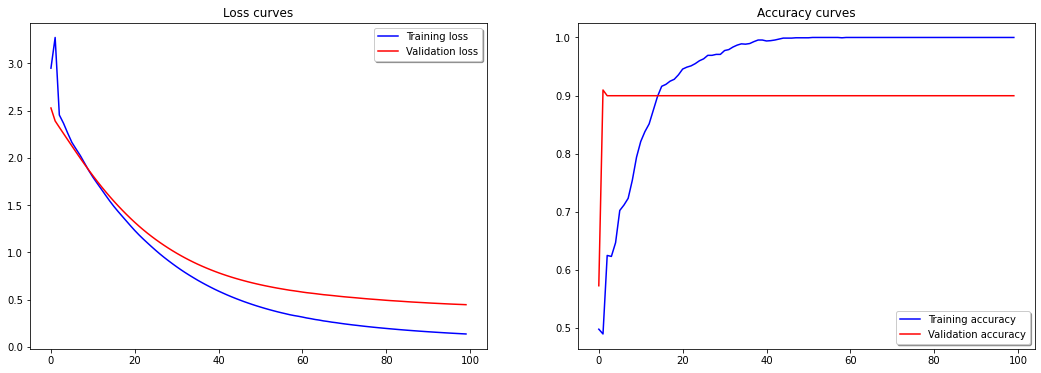

In [140]:
# Let's make a list of CONSTANTS for modelling:
LAYERS = [80, 80, 80, 1]             # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 100                           # number of epochs
LR = 5e-3                            # learning rate of the gradient descent
LAMBD = 3e-3                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(lr=LR))
print(model.summary())

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                    shuffle=True,verbose=0,
                    callbacks=[lr_decay, early_stop])
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)
# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [134]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

# all models

In [204]:
import pandas as pd
# df = pd.read_csv("")
df = pd.read_csv(r"/content/drive/MyDrive/section2ProjML/weatherAUS.csv")

df.drop(["Evaporation" ,"Sunshine","Cloud9am","Cloud3pm" ] ,axis=1,inplace=True)

df = df.fillna(method="ffill")
# df.dropna(inplace=True)

categorical_columns = []
for c in df.columns:
  if (type(df[c].iloc[0]) == str)&(c!="Date"):
    categorical_columns.append(c)

categorical_columns.remove("Location")
categorical_columns.remove("RainToday")
categorical_columns.remove("RainTomorrow")

# replace "yes" and "no"  in columns=["RainToday" , "RainTomorrow"] with "0" and "1"
df.RainToday.replace({"No":0, "Yes":1}, inplace=True)
df.RainTomorrow.replace({"No":0, "Yes":1}, inplace=True)
df = df.astype({"RainToday": np.float64})


for c in categorical_columns:
    for cc in df[c].unique():
        df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
    df.drop(c , axis=1, inplace=True)

d = df.pop("RainToday")
df["RainToday"] = d
d = df.pop("RainTomorrow")
df["RainTomorrow"] = d

df.set_index("Date" ,inplace=True)
df


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_SE,WindDir3pm_N,WindDir3pm_S,WindDir3pm_NNE,WindDir3pm_NE,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-06-22,Uluru,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2017-06-23,Uluru,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [216]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time
from sklearn.model_selection import train_test_split


# Let's make a list of CONSTANTS for modelling:
LAYERS = [80, 80, 80, 1]             # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 100                           # number of epochs
LR = 5e-3                            # learning rate of the gradient descent
LAMBD = 3e-3                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')



layers=[80, 80, 80, 1], train_examples=1819, test_examples=608
batch = 1819, timesteps = 6, features = 62, epochs = 100
lr = 0.005, lambda = 0.003, dropout = 0.0, recurr_dropout = 0.0


model_Albury
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 13.40 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 79.1644%
test accuracy = 80.2632%
test error = 120 out of 608 examples


<Figure size 432x288 with 0 Axes>

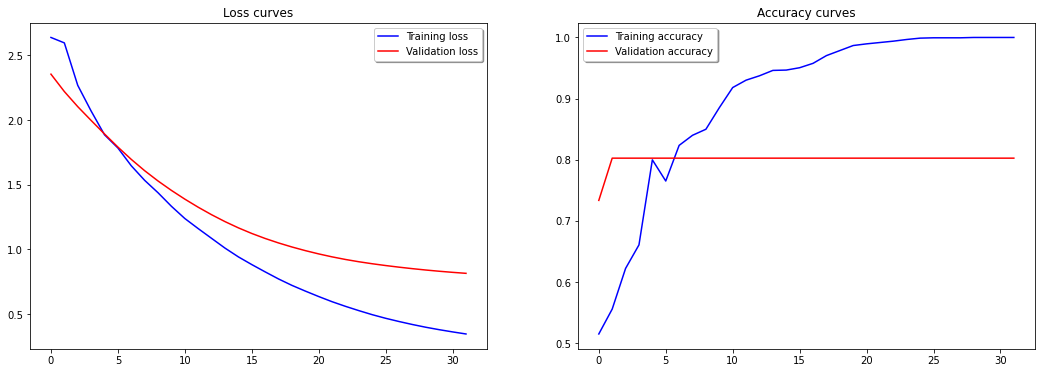

model_BadgerysCreek
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 3.
Epoch 00033: early stopping
-----------------------------------------------------------------
Training was completed in 13.44 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.0556%
test accuracy = 82.2259%
test error = 108 out of 608 examples


<Figure size 432x288 with 0 Axes>

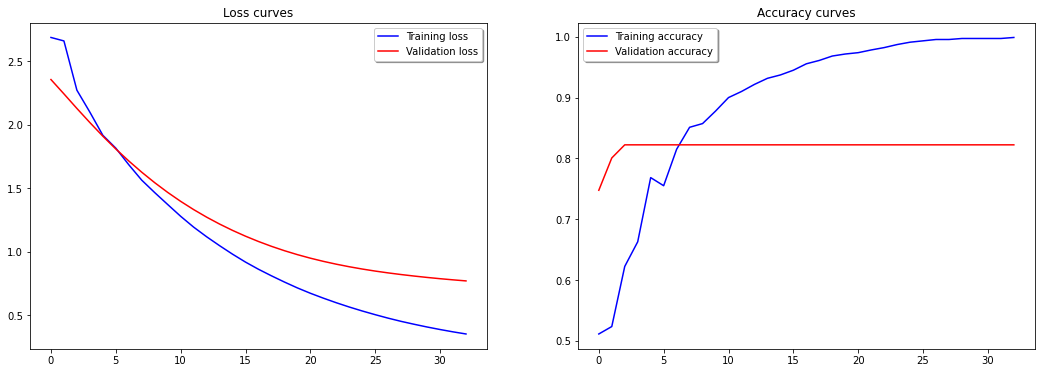

model_Cobar
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 13.64 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 87.1111%
test accuracy = 84.8837%
test error = 92 out of 608 examples


<Figure size 432x288 with 0 Axes>

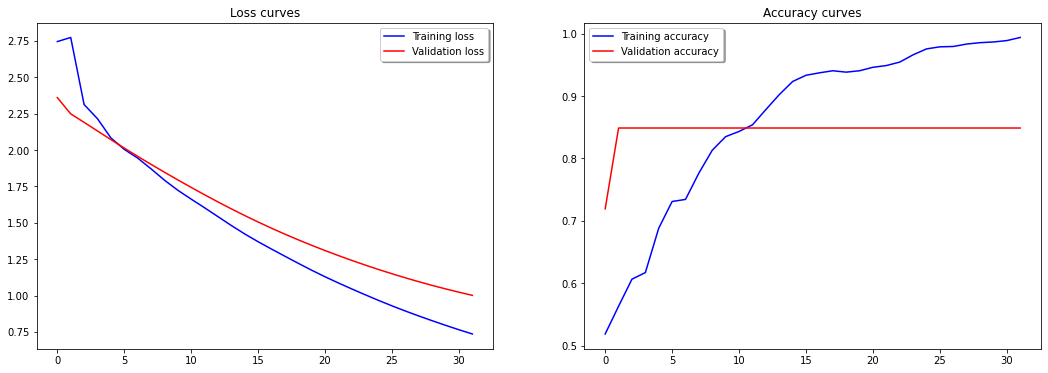

model_CoffsHarbour
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 14.04 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 69.6111%
test accuracy = 72.2591%
test error = 169 out of 608 examples


<Figure size 432x288 with 0 Axes>

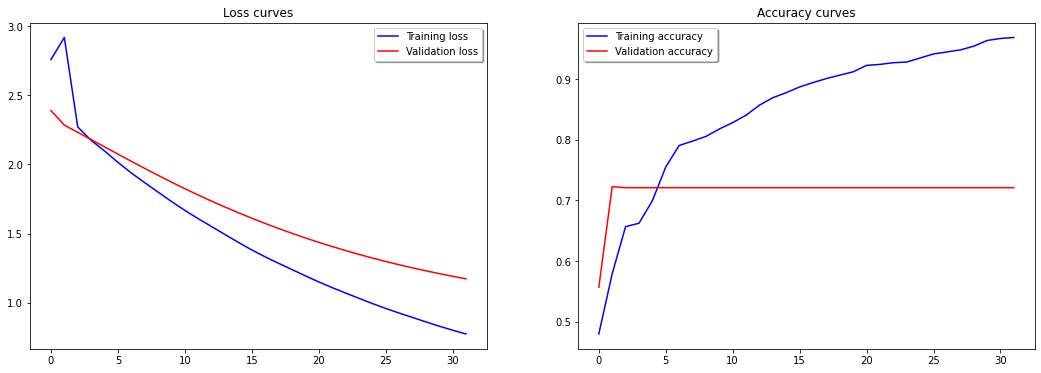

model_Moree
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 15.25 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 86.0556%
test accuracy = 85.0498%
test error = 91 out of 608 examples


<Figure size 432x288 with 0 Axes>

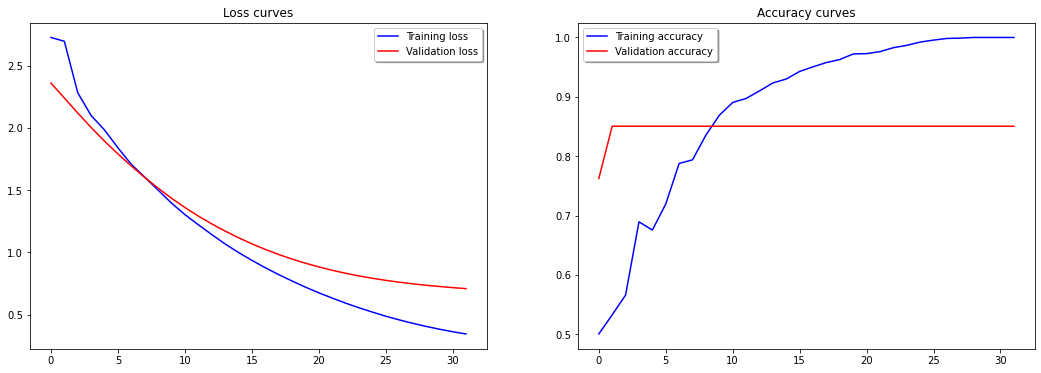

model_Newcastle
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 15.14 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.9725%
test accuracy = 75.4934%
test error = 149 out of 608 examples


<Figure size 432x288 with 0 Axes>

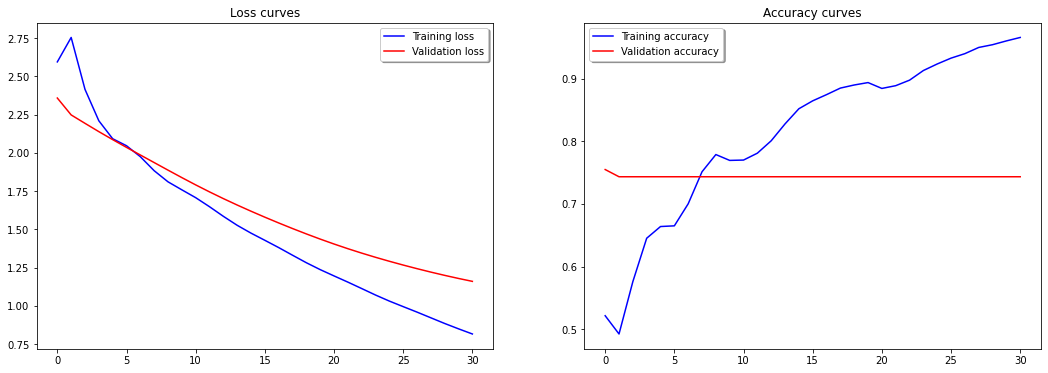

model_NorahHead
Train data dimensions: (1797, 6, 62), (1797, 1)
Test data dimensions: (601, 6, 62), (601, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 14.85 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 73.9009%
test accuracy = 72.0466%
test error = 170 out of 608 examples


<Figure size 432x288 with 0 Axes>

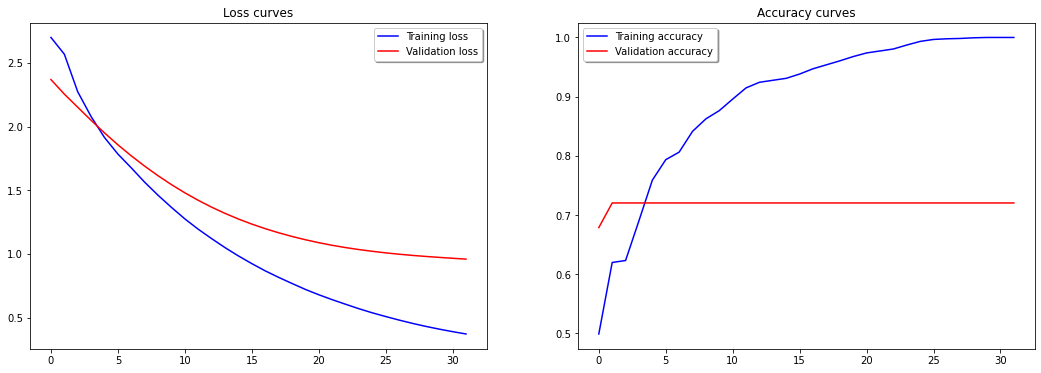

model_NorfolkIsland
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 16.00 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 66.2222%
test accuracy = 65.7807%
test error = 208 out of 608 examples


<Figure size 432x288 with 0 Axes>

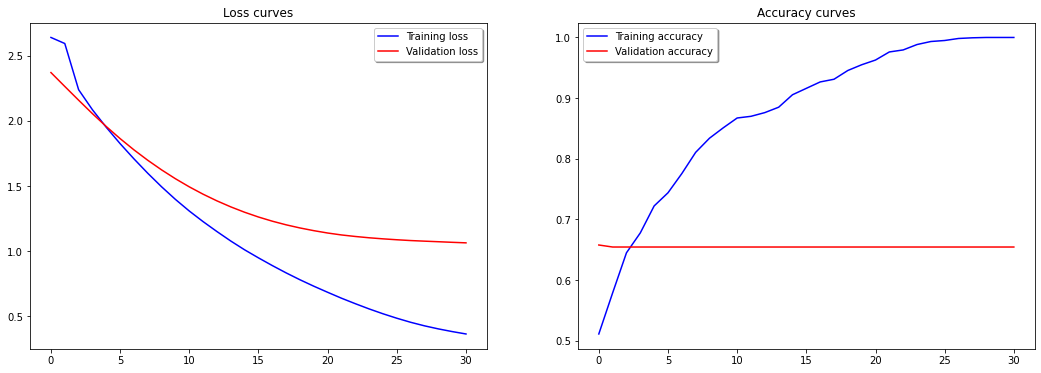

model_Penrith
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 17.47 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.6931%
test accuracy = 81.25%
test error = 114 out of 608 examples


<Figure size 432x288 with 0 Axes>

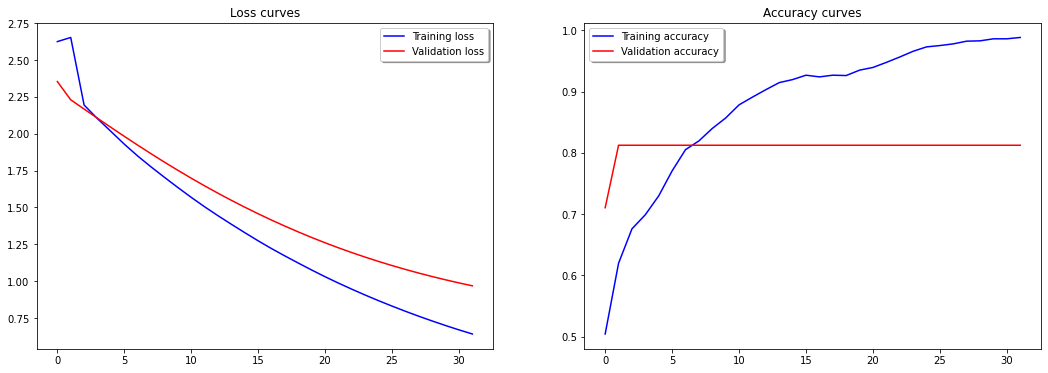

model_Richmond
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 18.51 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.8889%
test accuracy = 80.7309%
test error = 117 out of 608 examples


<Figure size 432x288 with 0 Axes>

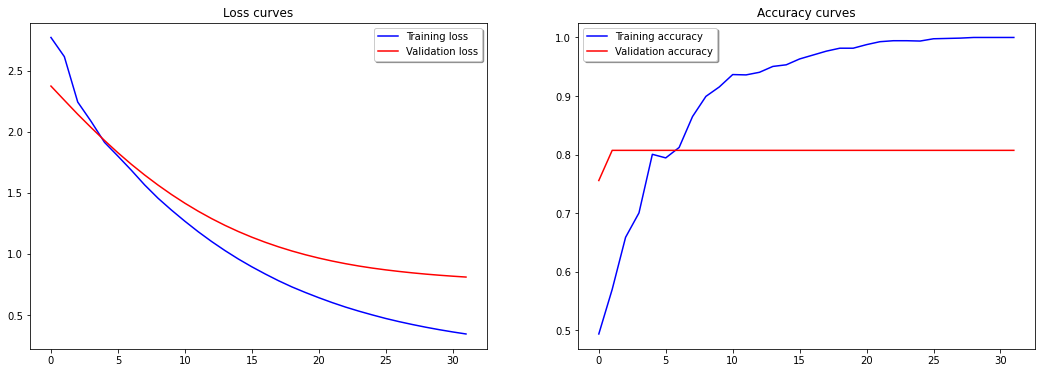

model_Sydney
Train data dimensions: (2001, 6, 62), (2001, 1)
Test data dimensions: (669, 6, 62), (669, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 21.69 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.6627%
test accuracy = 73.5197%
test error = 161 out of 608 examples


<Figure size 432x288 with 0 Axes>

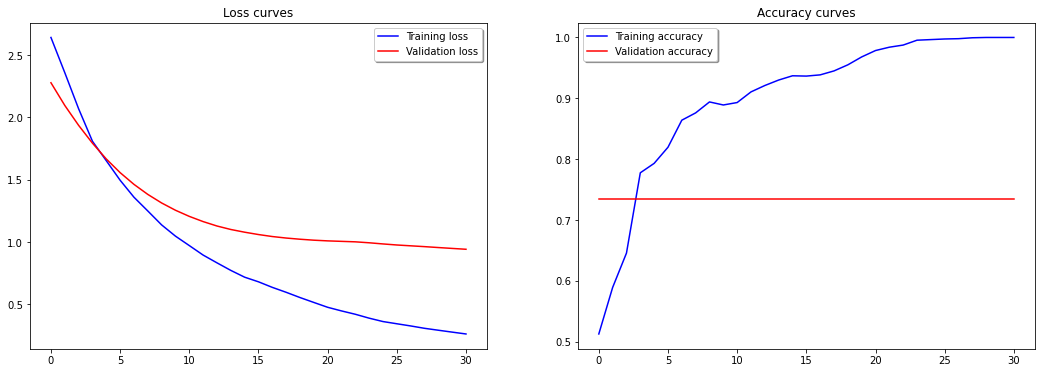

model_SydneyAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 19.82 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.4444%
test accuracy = 74.9169%
test error = 153 out of 608 examples


<Figure size 432x288 with 0 Axes>

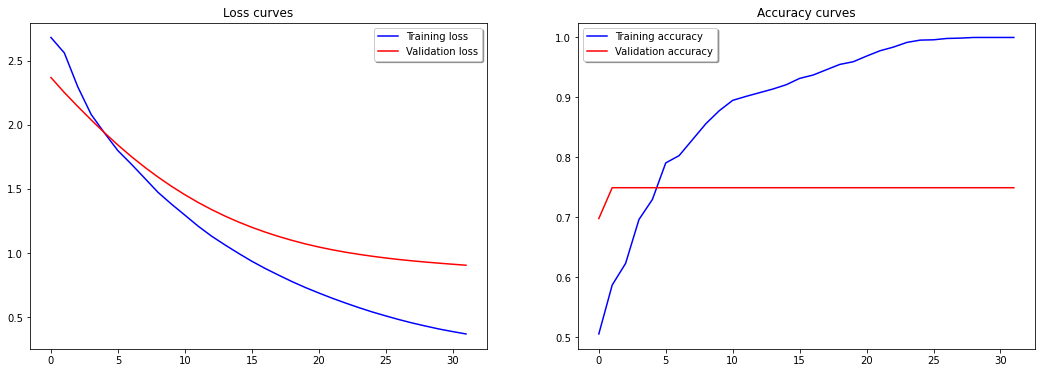

model_WaggaWagga
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 21.96 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.6667%
test accuracy = 79.7342%
test error = 123 out of 608 examples


<Figure size 432x288 with 0 Axes>

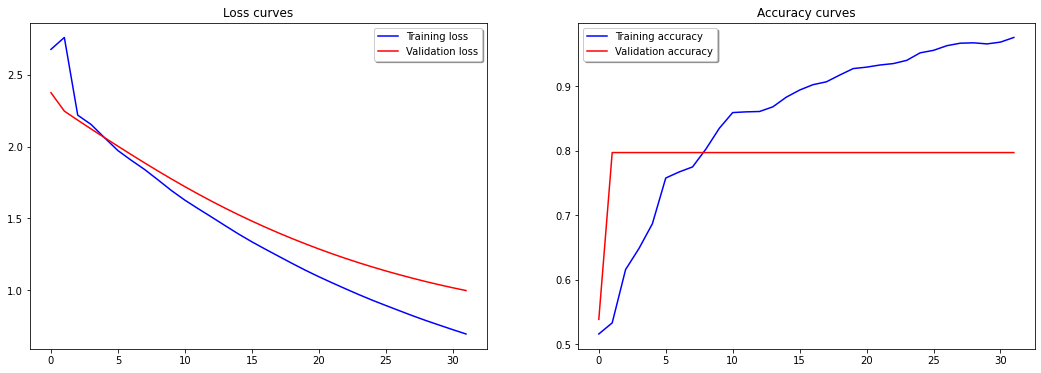

model_Williamtown
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 22.80 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 71.8333%
test accuracy = 75.5814%
test error = 148 out of 608 examples


<Figure size 432x288 with 0 Axes>

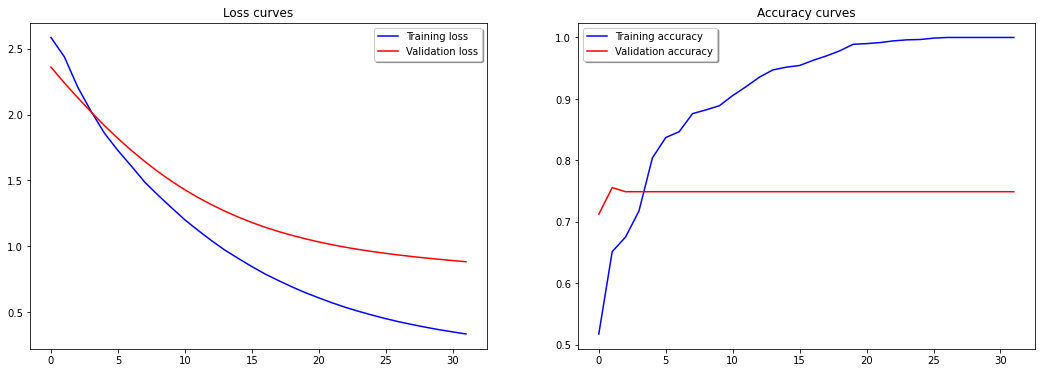

model_Wollongong
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 23.98 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.3606%
test accuracy = 77.1382%
test error = 139 out of 608 examples


<Figure size 432x288 with 0 Axes>

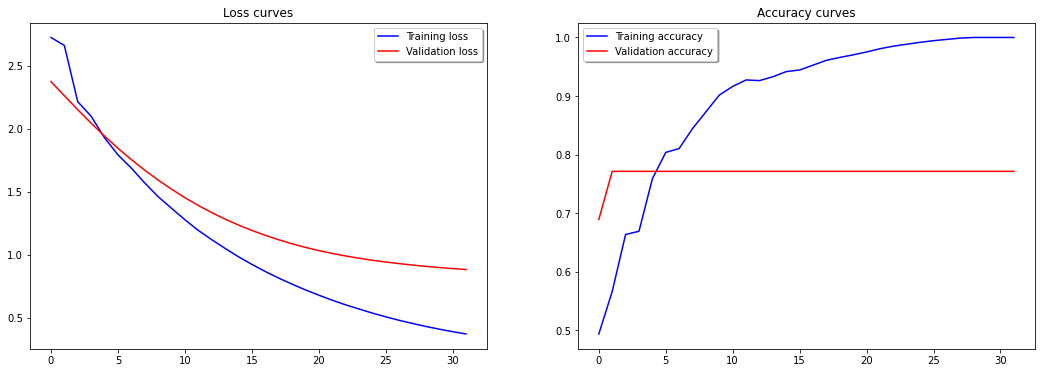

model_Canberra
Train data dimensions: (2056, 6, 62), (2056, 1)
Test data dimensions: (688, 6, 62), (688, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 31.66 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.5661%
test accuracy = 79.2763%
test error = 126 out of 608 examples


<Figure size 432x288 with 0 Axes>

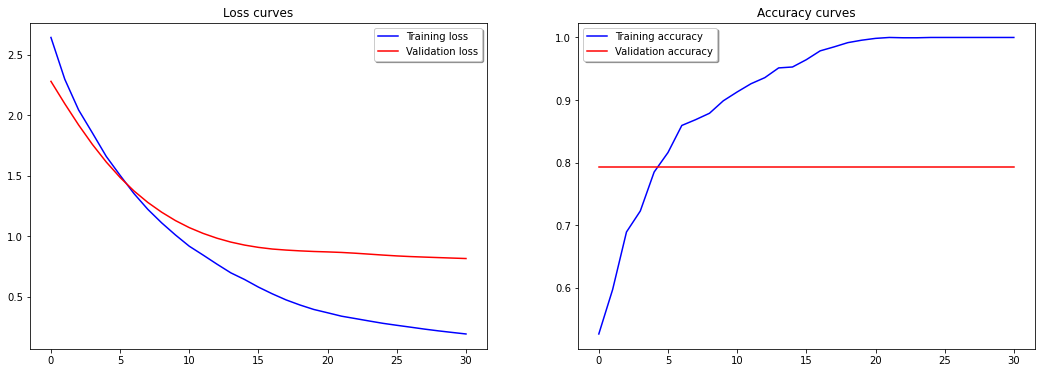

model_Tuggeranong
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 28.19 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.3531%
test accuracy = 78.7829%
test error = 129 out of 608 examples


<Figure size 432x288 with 0 Axes>

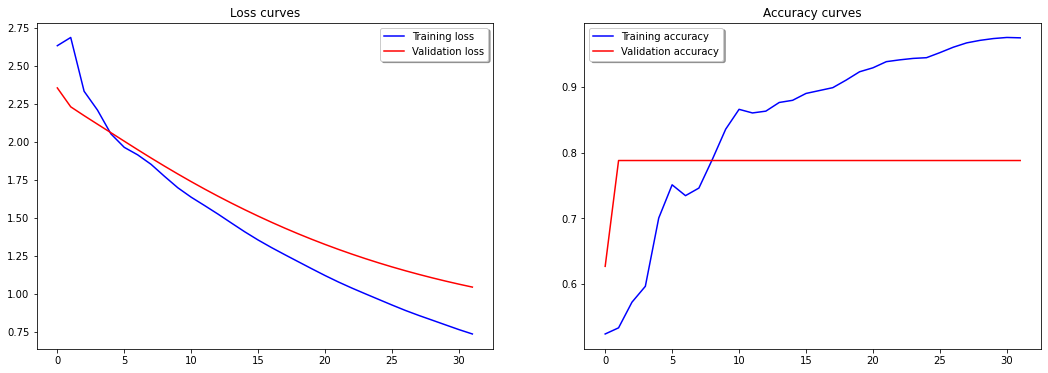

model_MountGinini
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 27.78 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 70.4783%
test accuracy = 71.875%
test error = 171 out of 608 examples


<Figure size 432x288 with 0 Axes>

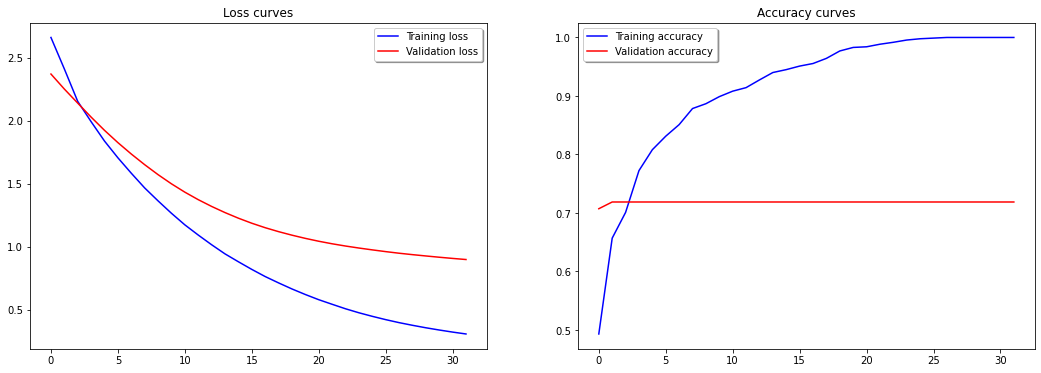

model_Ballarat
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 28.94 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 73.5019%
test accuracy = 74.8355%
test error = 153 out of 608 examples


<Figure size 432x288 with 0 Axes>

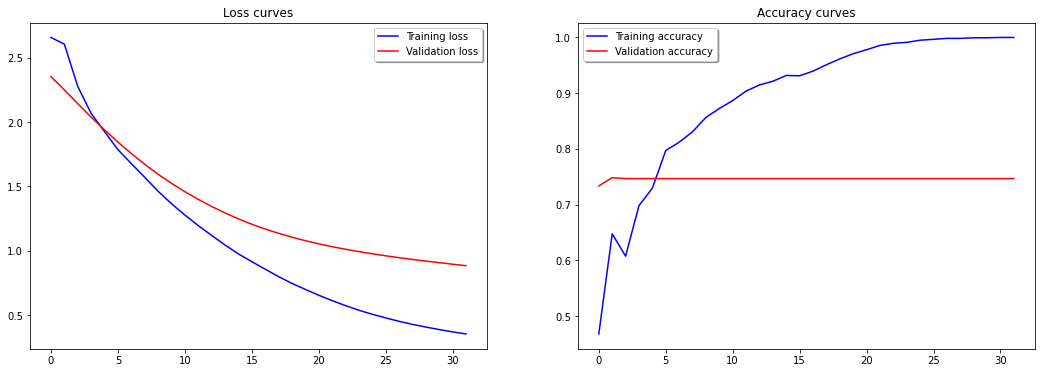

model_Bendigo
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 31.34 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.1435%
test accuracy = 80.7566%
test error = 117 out of 608 examples


<Figure size 432x288 with 0 Axes>

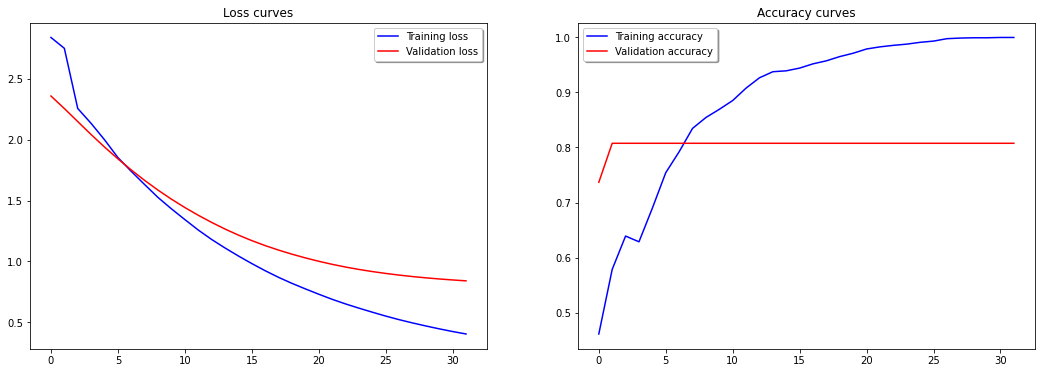

model_Sale
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 34.46 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 78.4444%
test accuracy = 80.0664%
test error = 121 out of 608 examples


<Figure size 432x288 with 0 Axes>

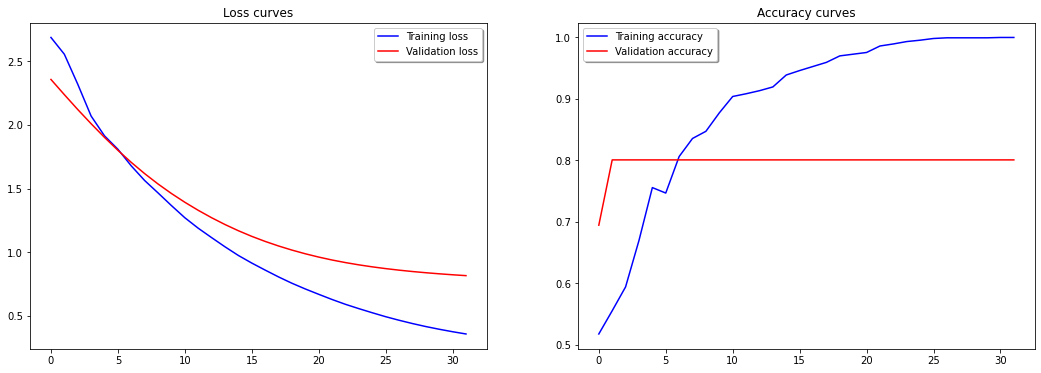

model_MelbourneAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 37.62 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 78.2222%
test accuracy = 77.4086%
test error = 137 out of 608 examples


<Figure size 432x288 with 0 Axes>

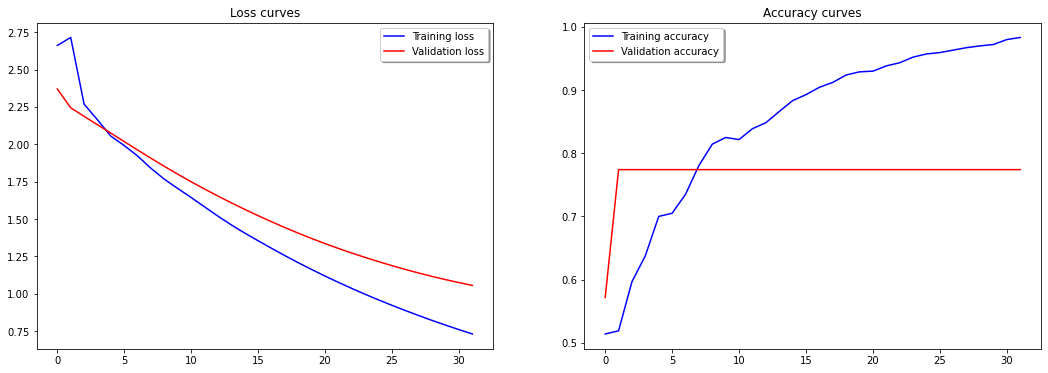

model_Melbourne
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 40.58 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 72.1466%
test accuracy = 82.8947%
test error = 104 out of 608 examples


<Figure size 432x288 with 0 Axes>

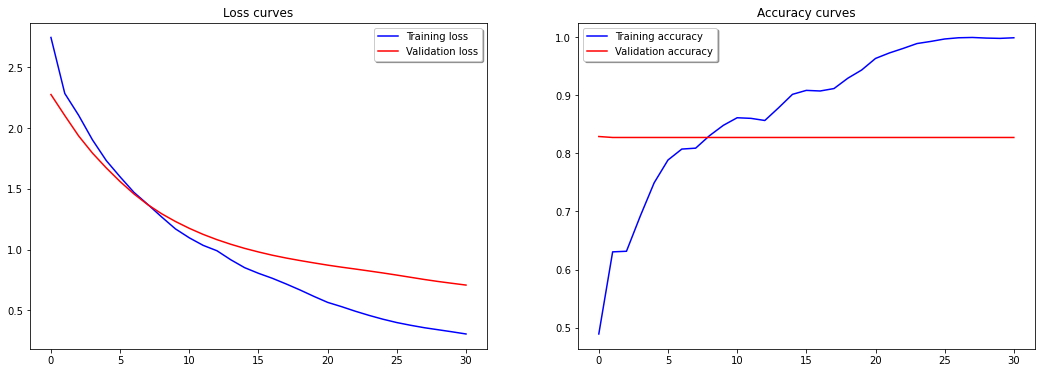

model_Mildura
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 39.34 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 88.3889%
test accuracy = 90.0332%
test error = 61 out of 608 examples


<Figure size 432x288 with 0 Axes>

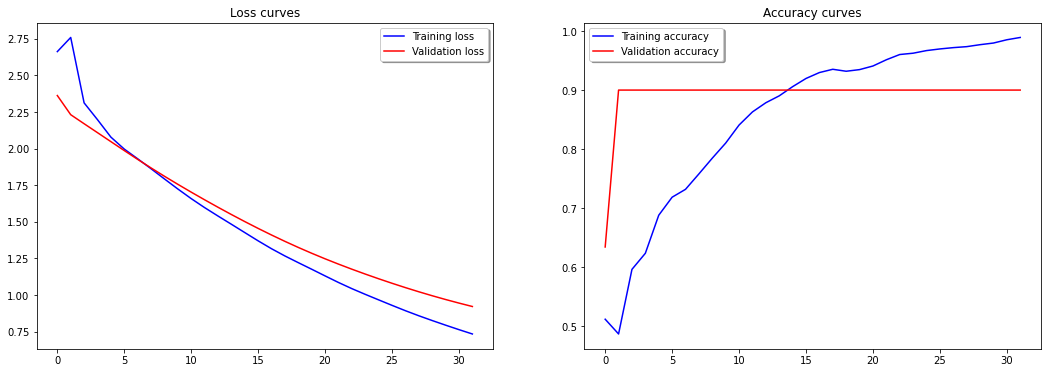

model_Nhil
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 28.32 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 84.6971%
test accuracy = 84.8101%
test error = 92 out of 608 examples


<Figure size 432x288 with 0 Axes>

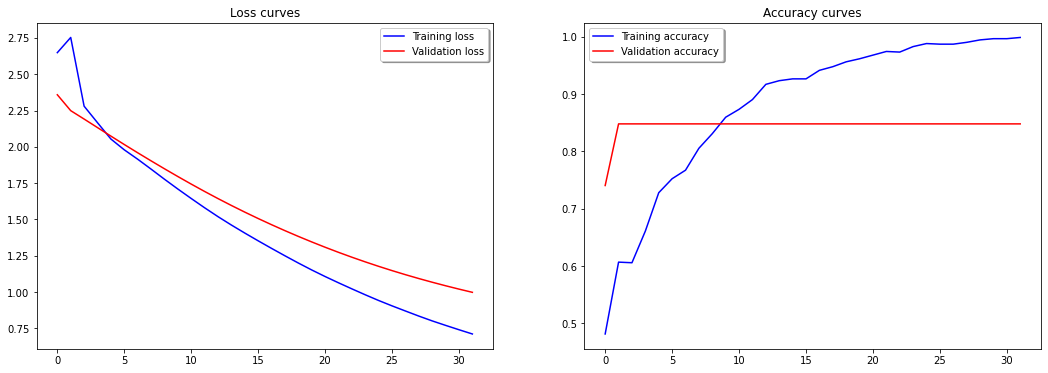

model_Portland
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 41.90 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 66.2778%
test accuracy = 67.9402%
test error = 195 out of 608 examples


<Figure size 432x288 with 0 Axes>

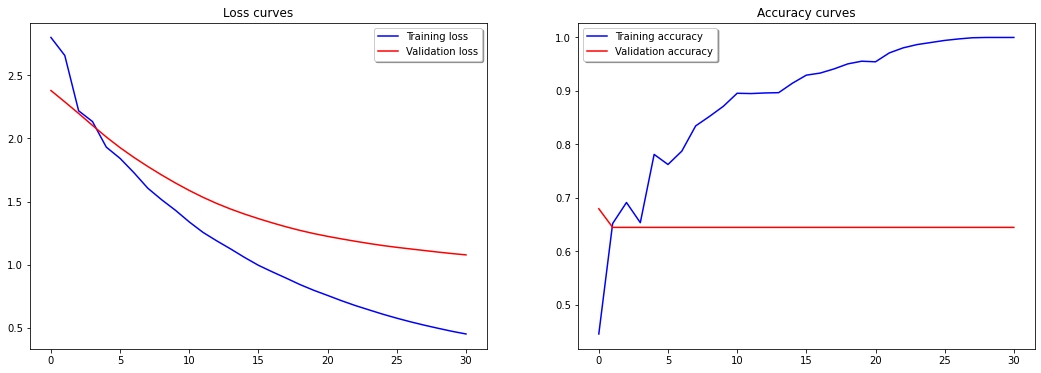

model_Watsonia
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 45.38 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.4444%
test accuracy = 76.2458%
test error = 144 out of 608 examples


<Figure size 432x288 with 0 Axes>

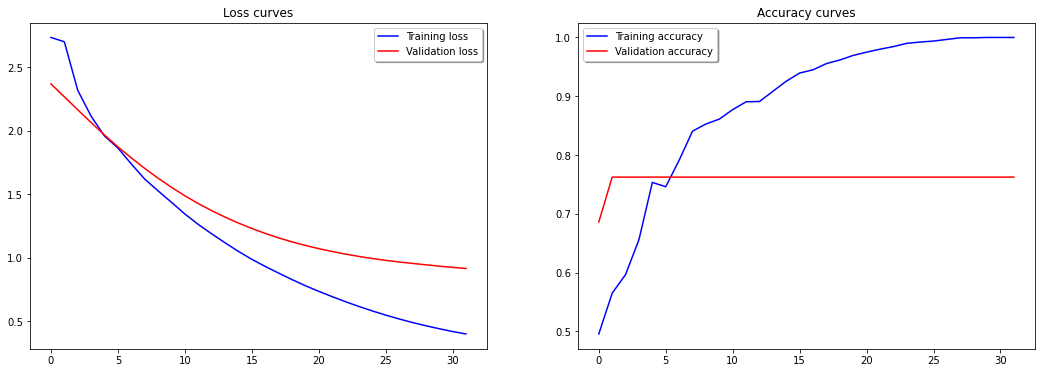

model_Dartmoor
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 45.66 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 68.5%
test accuracy = 71.2625%
test error = 175 out of 608 examples


<Figure size 432x288 with 0 Axes>

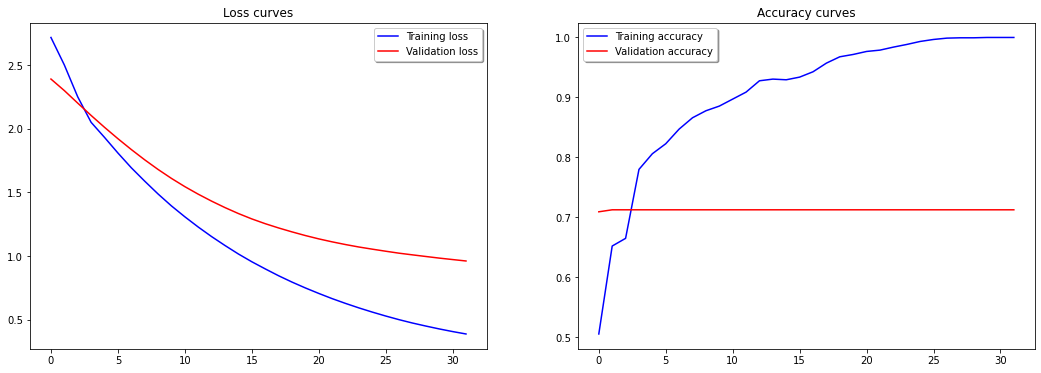

model_Brisbane
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 48.61 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.3874%
test accuracy = 79.7697%
test error = 123 out of 608 examples


<Figure size 432x288 with 0 Axes>

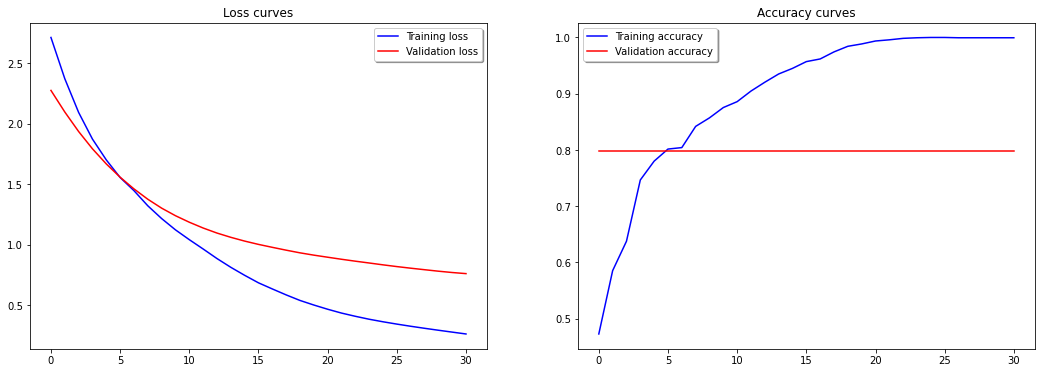

model_Cairns
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 44.38 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 70.9731%
test accuracy = 66.1184%
test error = 206 out of 608 examples


<Figure size 432x288 with 0 Axes>

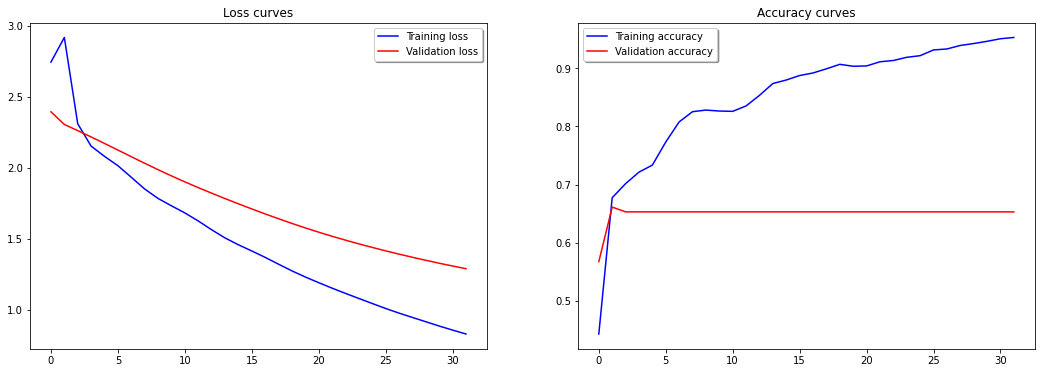

model_GoldCoast
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 45.99 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 73.282%
test accuracy = 74.8355%
test error = 153 out of 608 examples


<Figure size 432x288 with 0 Axes>

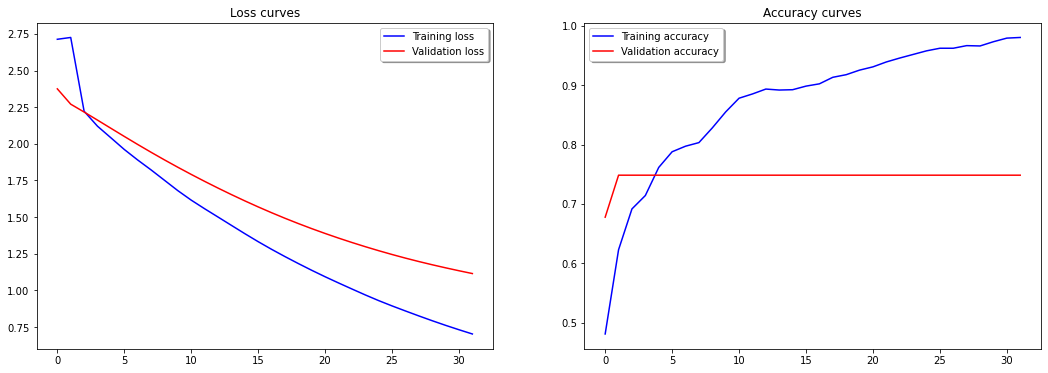

model_Townsville
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 48.79 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.243%
test accuracy = 82.2368%
test error = 108 out of 608 examples


<Figure size 432x288 with 0 Axes>

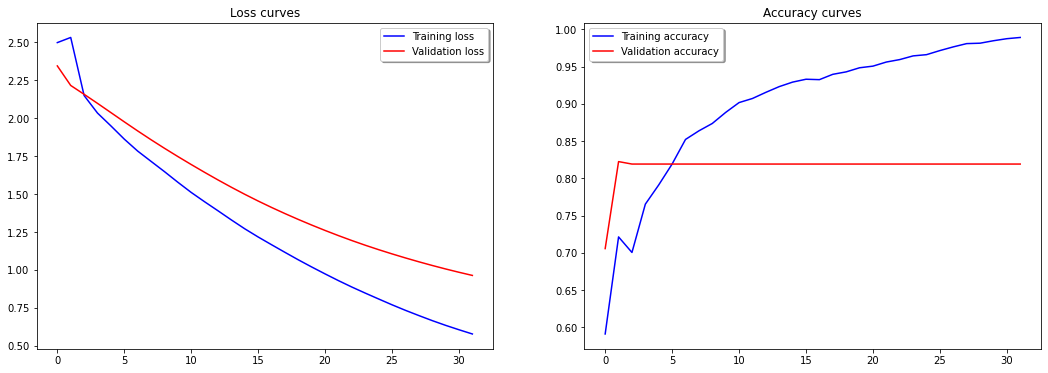

model_Adelaide
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 55.82 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.8063%
test accuracy = 80.0987%
test error = 121 out of 608 examples


<Figure size 432x288 with 0 Axes>

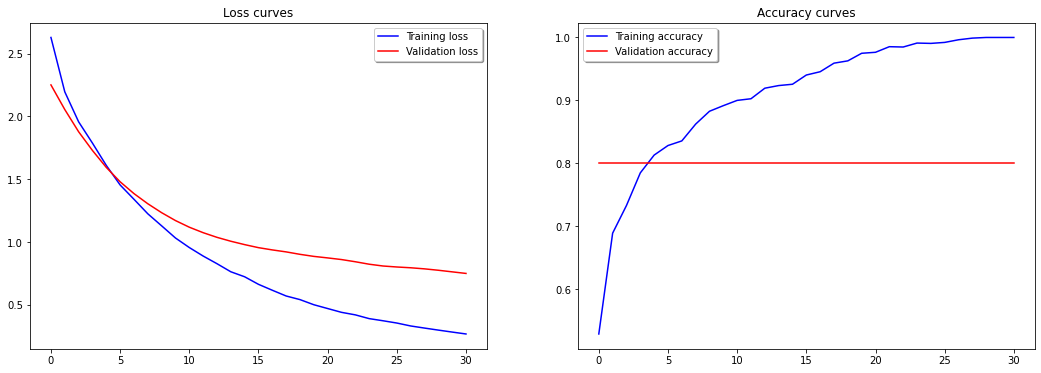

model_MountGambier
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 50.60 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 68.9939%
test accuracy = 70.2303%
test error = 181 out of 608 examples


<Figure size 432x288 with 0 Axes>

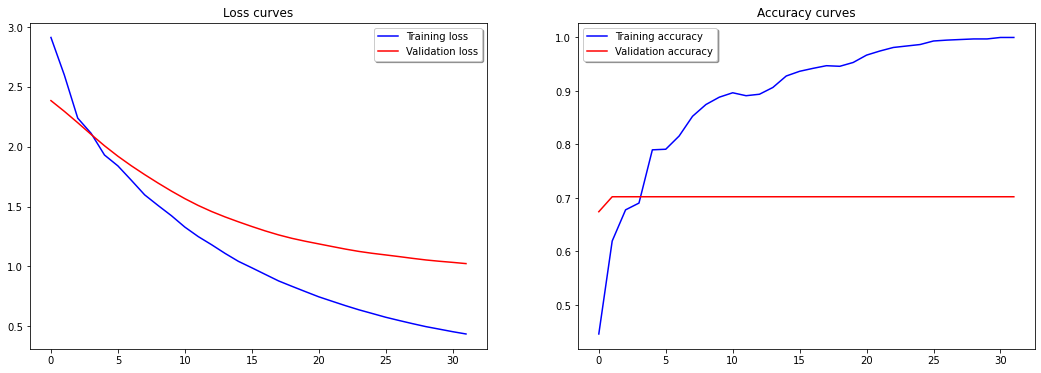

model_Nuriootpa
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 55.30 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.3333%
test accuracy = 78.5714%
test error = 130 out of 608 examples


<Figure size 432x288 with 0 Axes>

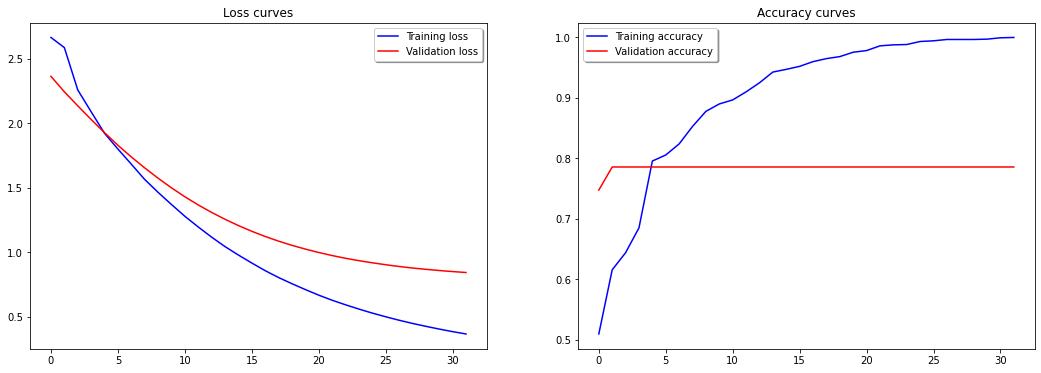

model_Woomera
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 57.28 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 92.7222%
test accuracy = 92.0266%
test error = 48 out of 608 examples


<Figure size 432x288 with 0 Axes>

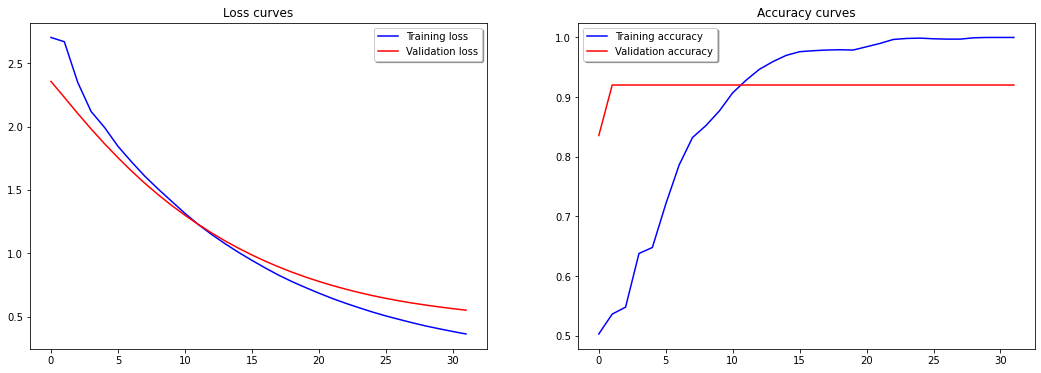

model_Albany
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 51.80 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 67.0698%
test accuracy = 71.7105%
test error = 172 out of 608 examples


<Figure size 432x288 with 0 Axes>

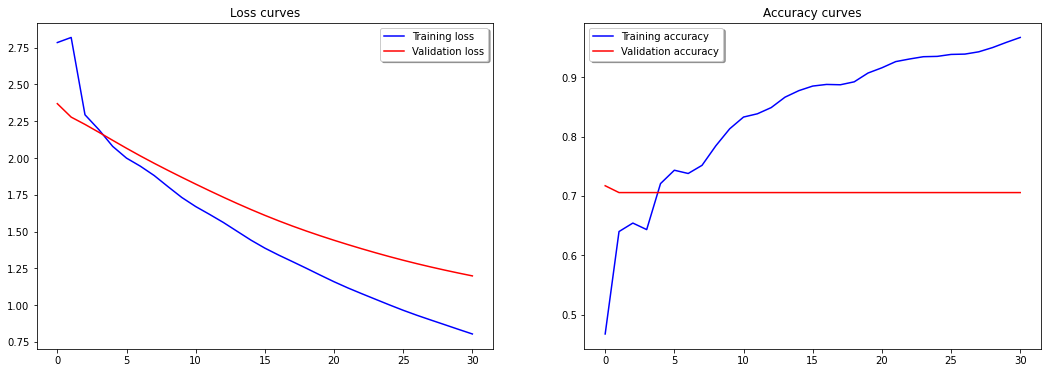

model_Witchcliffe
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 57.72 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.3333%
test accuracy = 72.9236%
test error = 165 out of 608 examples


<Figure size 432x288 with 0 Axes>

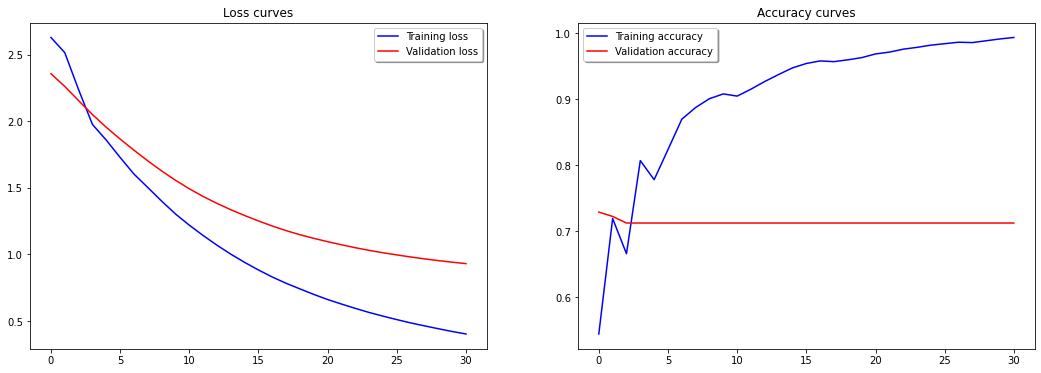

model_PearceRAAF
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 61.00 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.3333%
test accuracy = 81.8937%
test error = 110 out of 608 examples


<Figure size 432x288 with 0 Axes>

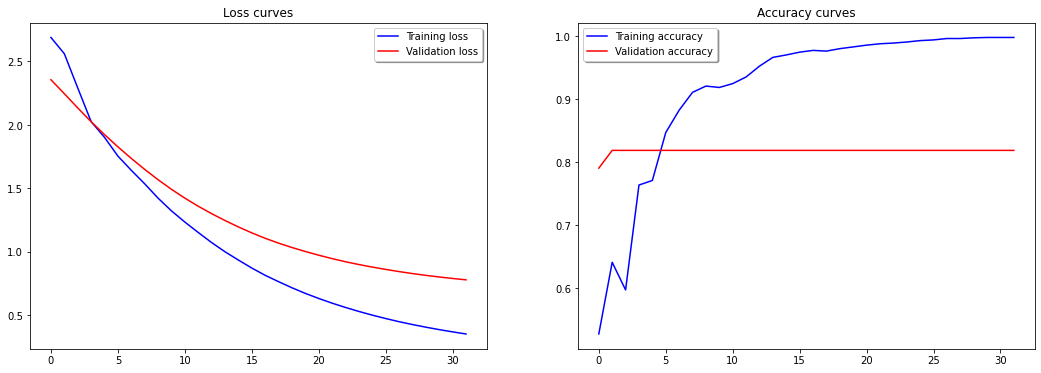

model_PerthAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 62.41 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.0556%
test accuracy = 82.2259%
test error = 108 out of 608 examples


<Figure size 432x288 with 0 Axes>

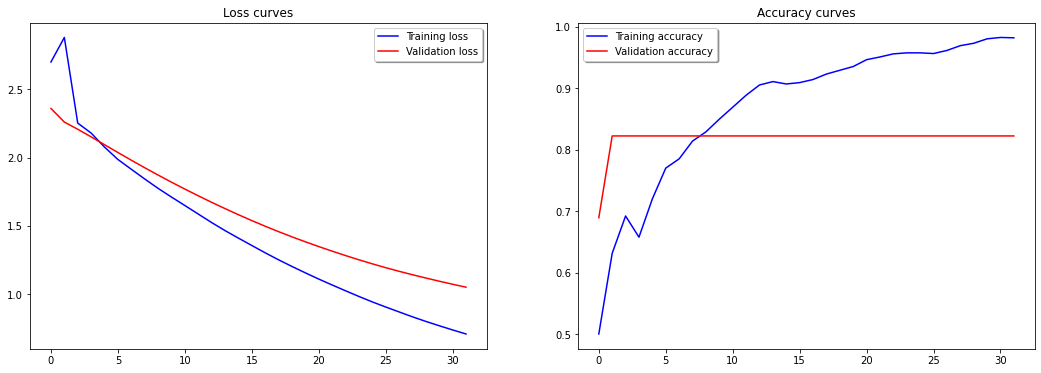

model_Perth
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 68.56 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 79.6859%
test accuracy = 79.4408%
test error = 125 out of 608 examples


<Figure size 432x288 with 0 Axes>

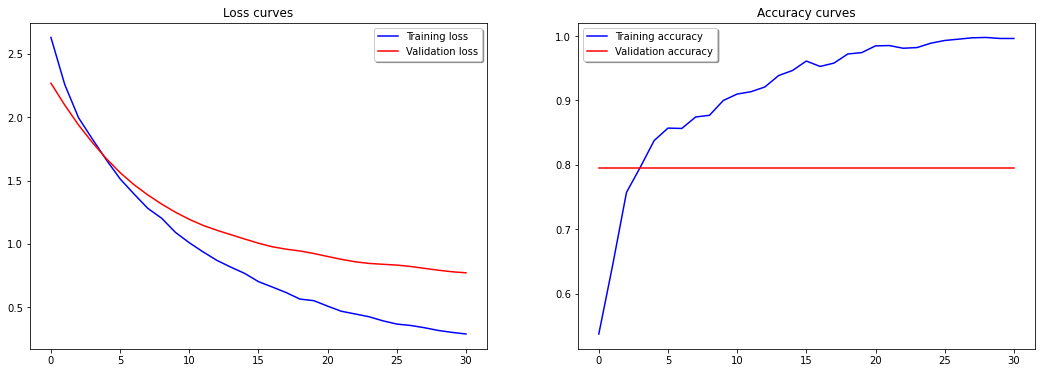

model_SalmonGums
Train data dimensions: (1795, 6, 62), (1795, 1)
Test data dimensions: (601, 6, 62), (601, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 65.13 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 84.8468%
test accuracy = 82.8619%
test error = 104 out of 608 examples


<Figure size 432x288 with 0 Axes>

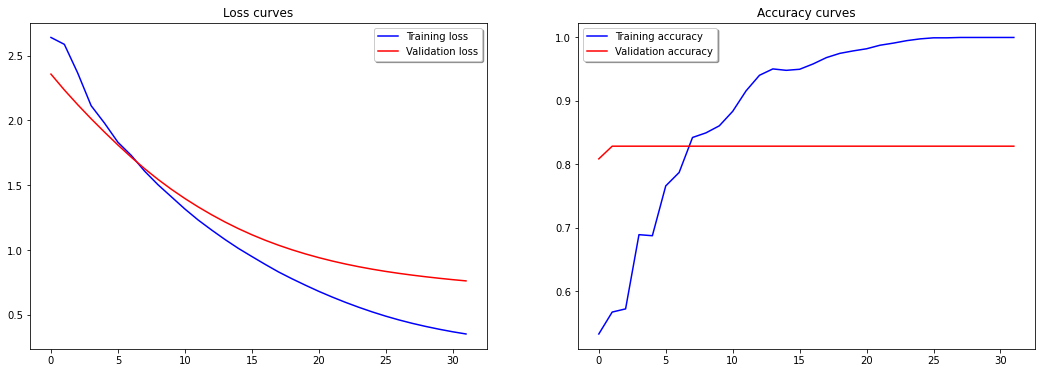

model_Walpole
Train data dimensions: (1798, 6, 62), (1798, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 65.00 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 71.9132%
test accuracy = 69.6013%
test error = 185 out of 608 examples


<Figure size 432x288 with 0 Axes>

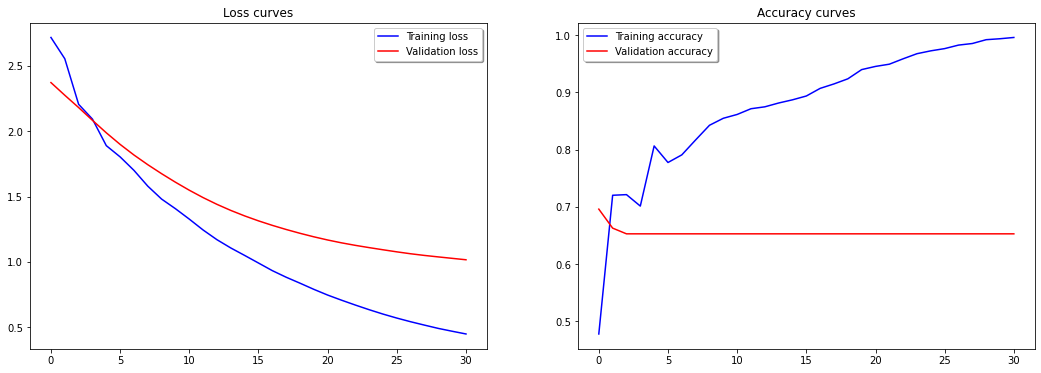

model_Hobart
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 69.84 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.6597%
test accuracy = 76.9737%
test error = 140 out of 608 examples


<Figure size 432x288 with 0 Axes>

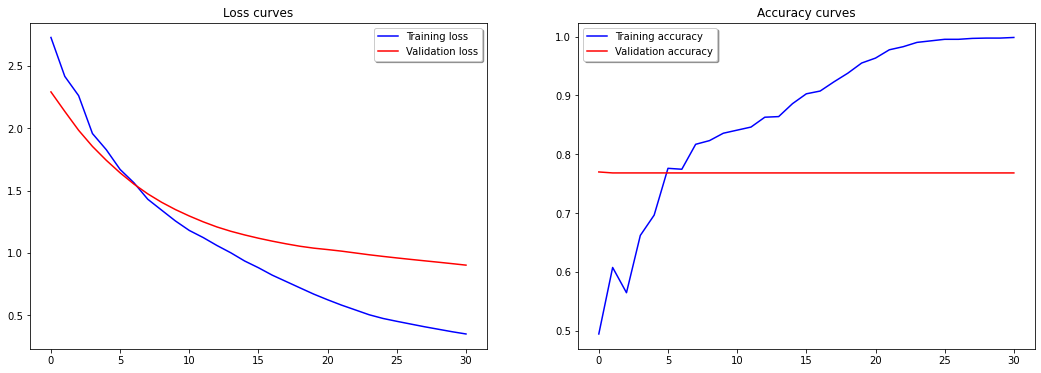

model_Launceston
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 66.21 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 75.7009%
test accuracy = 77.4671%
test error = 137 out of 608 examples


<Figure size 432x288 with 0 Axes>

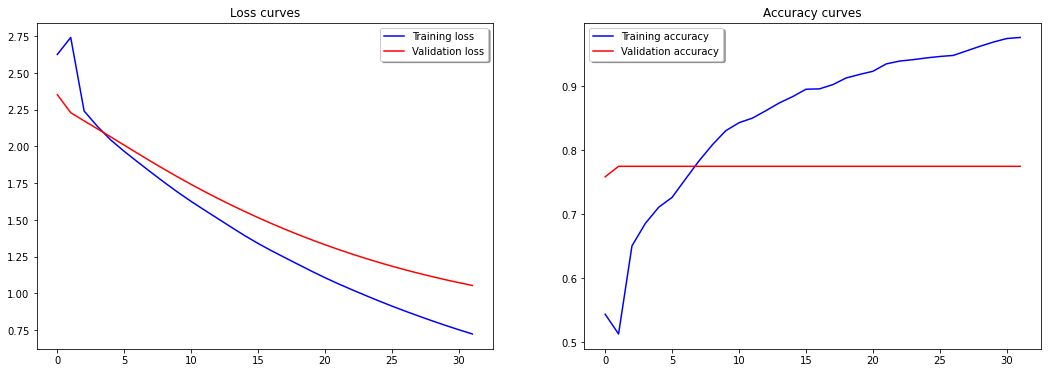

model_AliceSprings
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 68.27 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 91.3139%
test accuracy = 89.9671%
test error = 61 out of 608 examples


<Figure size 432x288 with 0 Axes>

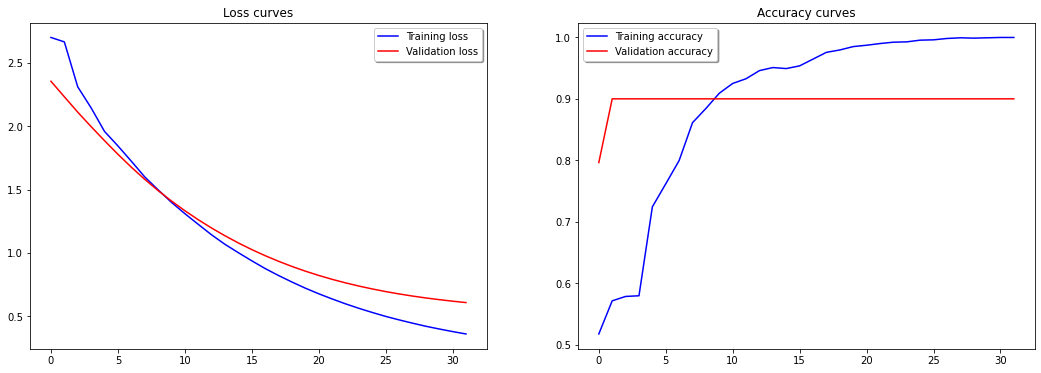

model_Darwin
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 1.
Epoch 00031: early stopping
-----------------------------------------------------------------
Training was completed in 76.86 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.5759%
test accuracy = 76.1513%
test error = 145 out of 608 examples


<Figure size 432x288 with 0 Axes>

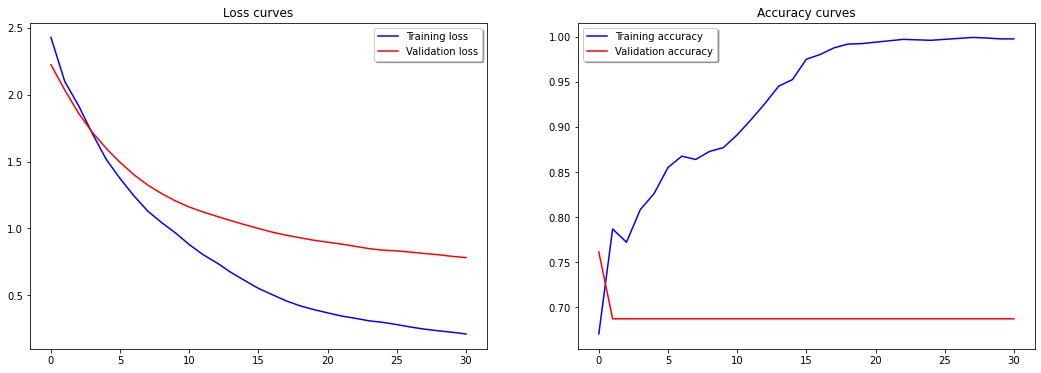

model_Katherine
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 44.30 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 88.8417%
test accuracy = 76.5823%
test error = 142 out of 608 examples


<Figure size 432x288 with 0 Axes>

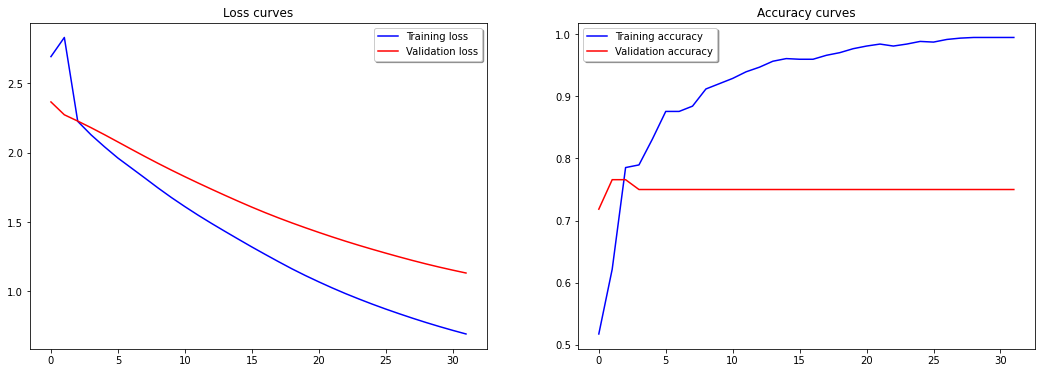

model_Uluru
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 2.
Epoch 00032: early stopping
-----------------------------------------------------------------
Training was completed in 41.56 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 93.7301%
test accuracy = 89.2405%
test error = 65 out of 608 examples


<Figure size 432x288 with 0 Axes>

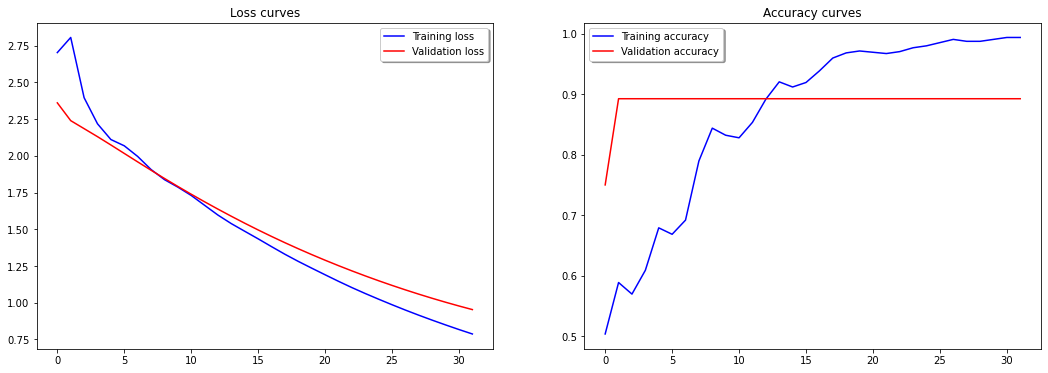

In [221]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 5+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(LSTM(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)

In [230]:
MODEL = {"Albury":model_Albury,
         "BadgerysCreek":model_BadgerysCreek,
         "Cobar":model_Cobar,
         "CoffsHarbour":model_CoffsHarbour,
         "Moree":model_Moree,
         "Newcastle":model_Newcastle,
         "NorahHead":model_NorahHead,
         "NorfolkIsland":model_NorfolkIsland,
         "Penrith":model_Penrith,
         "Richmond":model_Richmond,
         "Sydney":model_Sydney,
         "SydneyAirport":model_SydneyAirport,
         "WaggaWagga":model_WaggaWagga,
         "Williamtown":model_Williamtown,
         "Wollongong":model_Wollongong,
         "Canberra":model_Canberra,
         "Tuggeranong":model_Tuggeranong,
         "MountGinini":model_MountGinini,
         "Ballarat":model_Ballarat,
         "Bendigo":model_Bendigo,
         "Sale":model_Sale,
         "MelbourneAirport":model_MelbourneAirport,
         "Melbourne":model_Melbourne,
         "Mildura":model_Mildura,
         "Nhil":model_Nhil,
         "Portland":model_Portland,
         "Watsonia":model_Watsonia,
         "Dartmoor":model_Dartmoor,
         "Brisbane":model_Brisbane,
         "Cairns":model_Cairns,
         "GoldCoast":model_GoldCoast,
         "Townsville":model_Townsville,
         "Adelaide":model_Adelaide,
         "MountGambier":model_MountGambier,
         "Nuriootpa":model_Nuriootpa,
         "Woomera":model_Woomera,
         "Albany":model_Albany,
         "Witchcliffe":model_Witchcliffe,
         "PearceRAAF":model_PearceRAAF,
         "PerthAirport":model_PerthAirport,
         "Perth":model_Perth,
         "SalmonGums":model_SalmonGums,
         "Walpole":model_Walpole,
         "Hobart":model_Hobart,
         "Launceston":model_Launceston,
         "AliceSprings":model_AliceSprings,
         "Darwin":model_Darwin,
         "Katherine":model_Katherine,
         "Uluru":model_Uluru,}

# new data

In [233]:
df_test = df.iloc[69395 : 71395]
lcl = locals()
for city in df_test.Location.unique():
    print(city)
    lcl[f"df_{city}"] = df_test[df_test.Location==city]
    model = MODEL[city]
    # pre_processing of df_test
    # predicte with model

Melbourne
Mildura


# T=3 window

In [ ]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 3+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(LSTM(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)

# T = 10 window

In [ ]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 10+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(LSTM(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)

# GRU

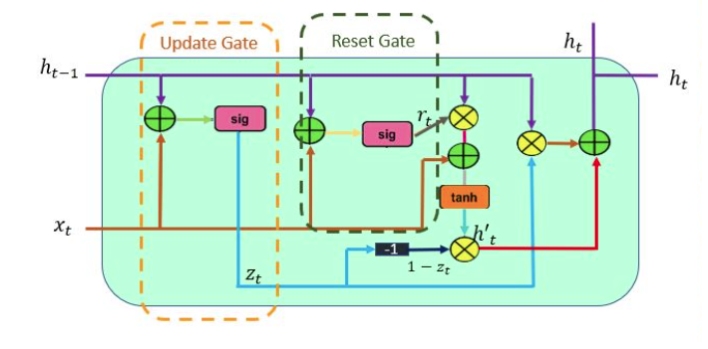

In [234]:
import pandas as pd
# df = pd.read_csv("")
df = pd.read_csv(r"/content/drive/MyDrive/section2ProjML/weatherAUS.csv")

df.drop(["Evaporation" ,"Sunshine","Cloud9am","Cloud3pm" ] ,axis=1,inplace=True)

df = df.fillna(method="ffill")
# df.dropna(inplace=True)

categorical_columns = []
for c in df.columns:
  if (type(df[c].iloc[0]) == str)&(c!="Date"):
    categorical_columns.append(c)

categorical_columns.remove("Location")
categorical_columns.remove("RainToday")
categorical_columns.remove("RainTomorrow")

# replace "yes" and "no"  in columns=["RainToday" , "RainTomorrow"] with "0" and "1"
df.RainToday.replace({"No":0, "Yes":1}, inplace=True)
df.RainTomorrow.replace({"No":0, "Yes":1}, inplace=True)
df = df.astype({"RainToday": np.float64})


for c in categorical_columns:
    for cc in df[c].unique():
        df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
    df.drop(c , axis=1, inplace=True)

d = df.pop("RainToday")
df["RainToday"] = d
d = df.pop("RainTomorrow")
df["RainTomorrow"] = d

df.set_index("Date" ,inplace=True)
df


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_SE,WindDir3pm_N,WindDir3pm_S,WindDir3pm_NNE,WindDir3pm_NE,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-06-22,Uluru,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2017-06-23,Uluru,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [237]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization , GRU
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time
from sklearn.model_selection import train_test_split


# Let's make a list of CONSTANTS for modelling:
LAYERS = [80, 80, 80, 1]             # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 100                           # number of epochs
LR = 5e-3                            # learning rate of the gradient descent
LAMBD = 3e-3                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')



layers=[80, 80, 80, 1], train_examples=1819, test_examples=608
batch = 1819, timesteps = 6, features = 62, epochs = 100
lr = 0.005, lambda = 0.003, dropout = 0.0, recurr_dropout = 0.0


0     model_Albury
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 30.
Epoch 00060: early stopping
-----------------------------------------------------------------
Training was completed in 93.71 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 83.5624%
test accuracy = 83.8816%
test error = 98 out of 608 examples


<Figure size 432x288 with 0 Axes>

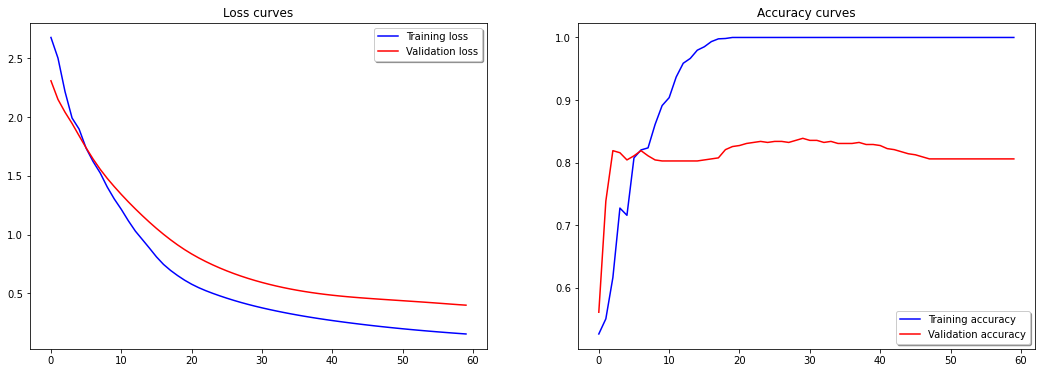

1     model_BadgerysCreek
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 33.
Epoch 00063: early stopping
-----------------------------------------------------------------
Training was completed in 109.64 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 87.5%
test accuracy = 89.701%
test error = 63 out of 608 examples


<Figure size 432x288 with 0 Axes>

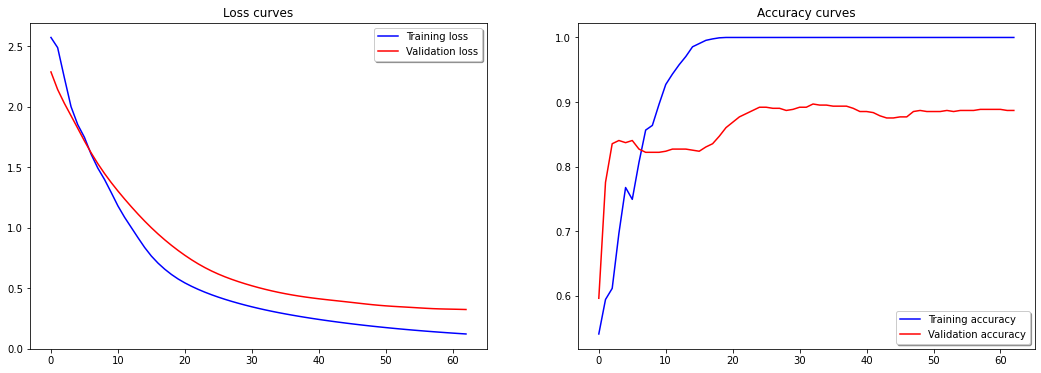

2     model_Cobar
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 42.
Epoch 00072: early stopping
-----------------------------------------------------------------
Training was completed in 120.94 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 92.7222%
test accuracy = 90.1993%
test error = 60 out of 608 examples


<Figure size 432x288 with 0 Axes>

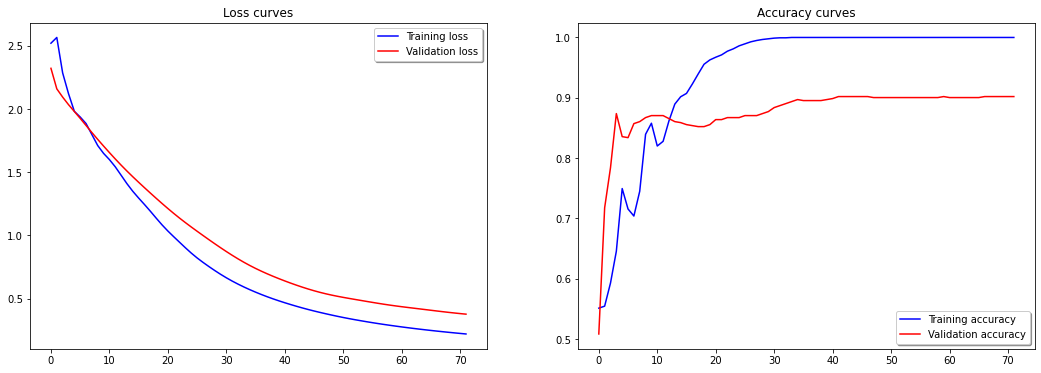

3     model_CoffsHarbour
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


-----------------------------------------------------------------
Training was completed in 171.76 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8339%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

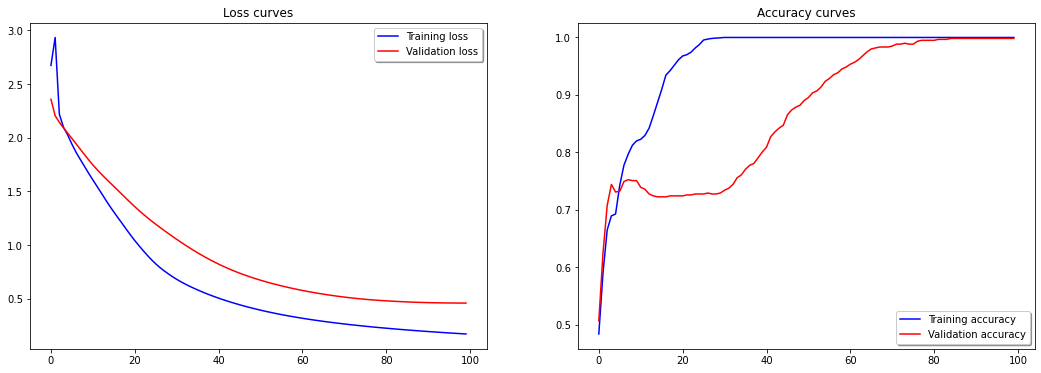

4     model_Moree
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 25.
Epoch 00055: early stopping
-----------------------------------------------------------------
Training was completed in 93.64 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 87.8333%
test accuracy = 86.711%
test error = 81 out of 608 examples


<Figure size 432x288 with 0 Axes>

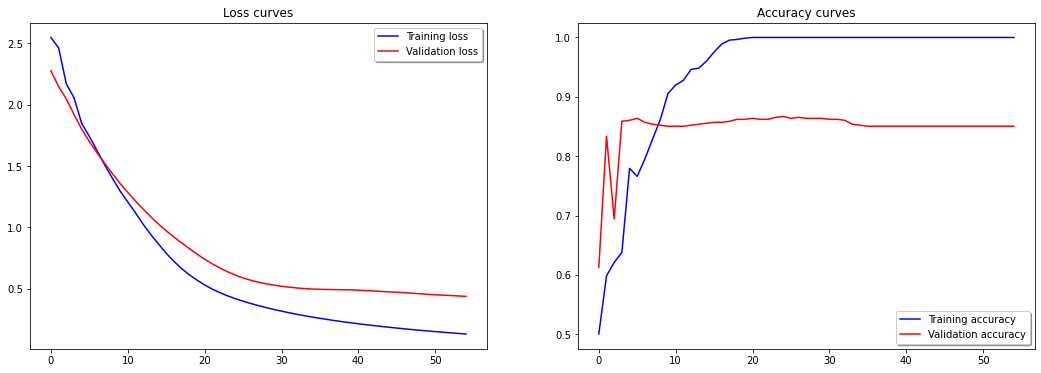

5     model_Newcastle
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 58.
Epoch 00088: early stopping
-----------------------------------------------------------------
Training was completed in 148.09 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

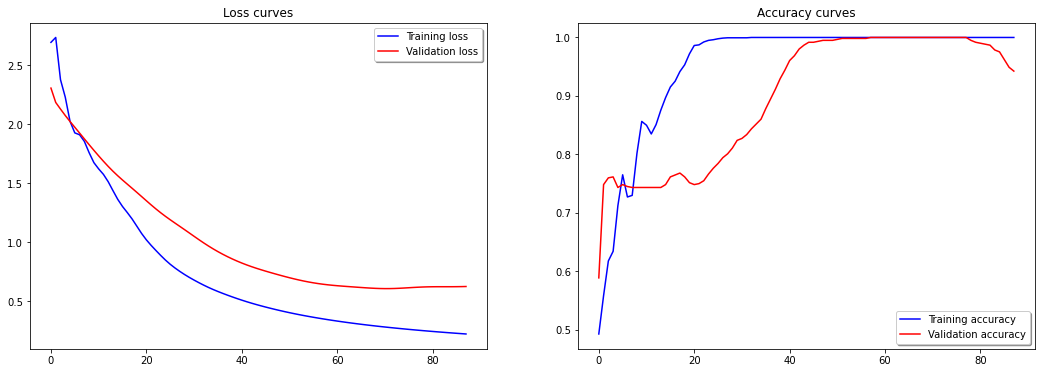

6     model_NorahHead
Train data dimensions: (1797, 6, 62), (1797, 1)
Test data dimensions: (601, 6, 62), (601, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 64.
Epoch 00094: early stopping
-----------------------------------------------------------------
Training was completed in 162.79 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.9444%
test accuracy = 99.8336%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

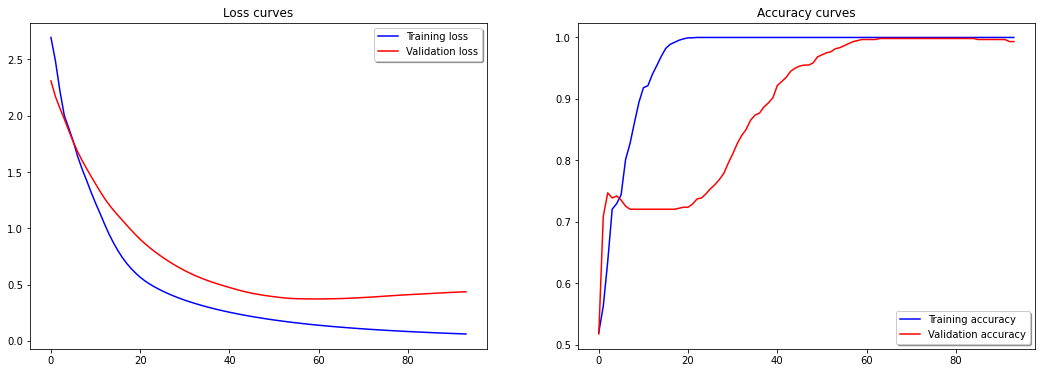

7     model_NorfolkIsland
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


-----------------------------------------------------------------
Training was completed in 173.75 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

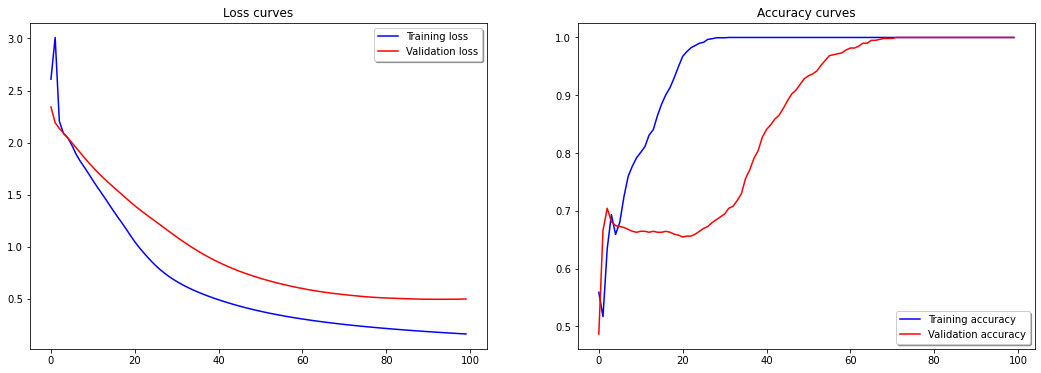

8     model_Penrith
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 27.
Epoch 00057: early stopping
-----------------------------------------------------------------
Training was completed in 98.84 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 94.4995%
test accuracy = 93.5855%
test error = 39 out of 608 examples


<Figure size 432x288 with 0 Axes>

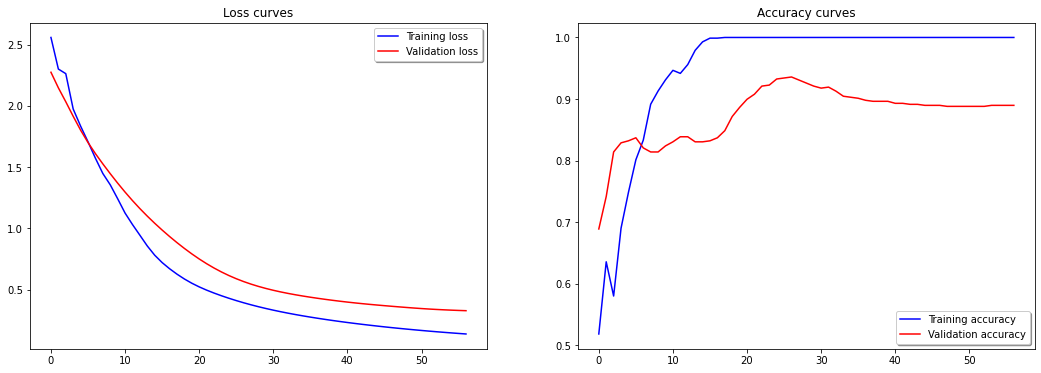

9     model_Richmond
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 27.
Epoch 00057: early stopping
-----------------------------------------------------------------
Training was completed in 102.95 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 91.1111%
test accuracy = 90.3654%
test error = 59 out of 608 examples


<Figure size 432x288 with 0 Axes>

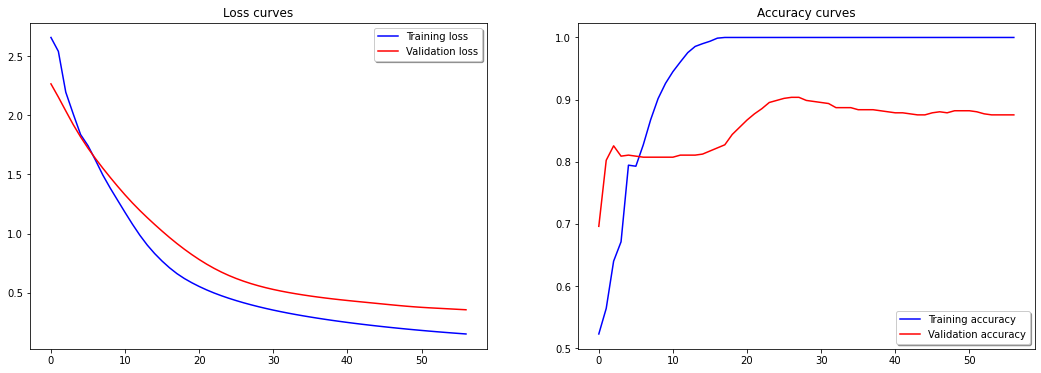

10     model_Sydney
Train data dimensions: (2001, 6, 62), (2001, 1)
Test data dimensions: (669, 6, 62), (669, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 32.
Epoch 00062: early stopping
-----------------------------------------------------------------
Training was completed in 139.52 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 96.5517%
test accuracy = 94.5724%
test error = 33 out of 608 examples


<Figure size 432x288 with 0 Axes>

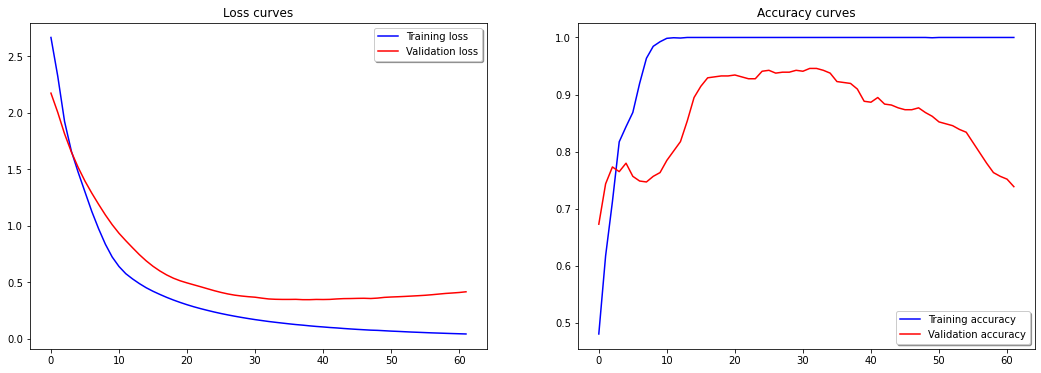

11     model_SydneyAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 48.
Epoch 00078: early stopping
-----------------------------------------------------------------
Training was completed in 136.31 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

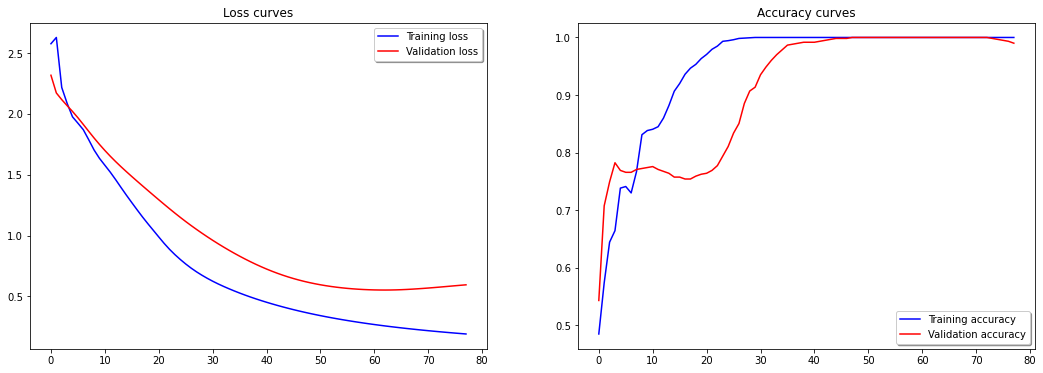

12     model_WaggaWagga
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 34.
Epoch 00064: early stopping
-----------------------------------------------------------------
Training was completed in 114.79 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 84.5%
test accuracy = 81.5615%
test error = 112 out of 608 examples


<Figure size 432x288 with 0 Axes>

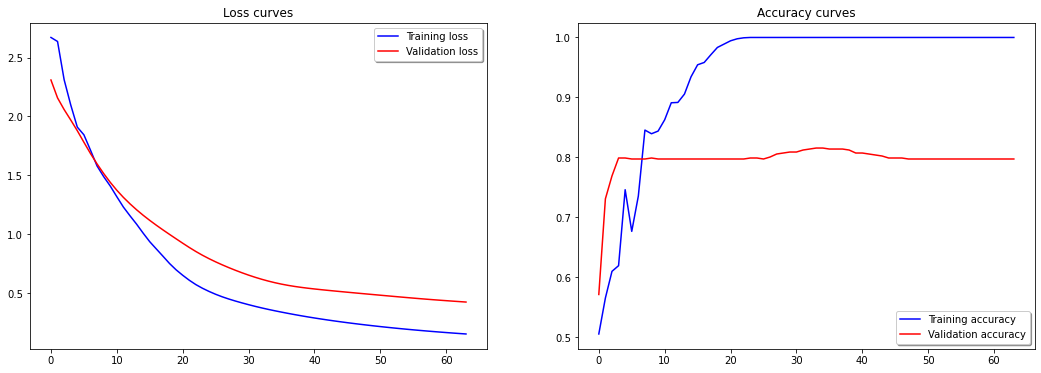

13     model_Williamtown
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 55.
Epoch 00085: early stopping
-----------------------------------------------------------------
Training was completed in 156.81 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.9444%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

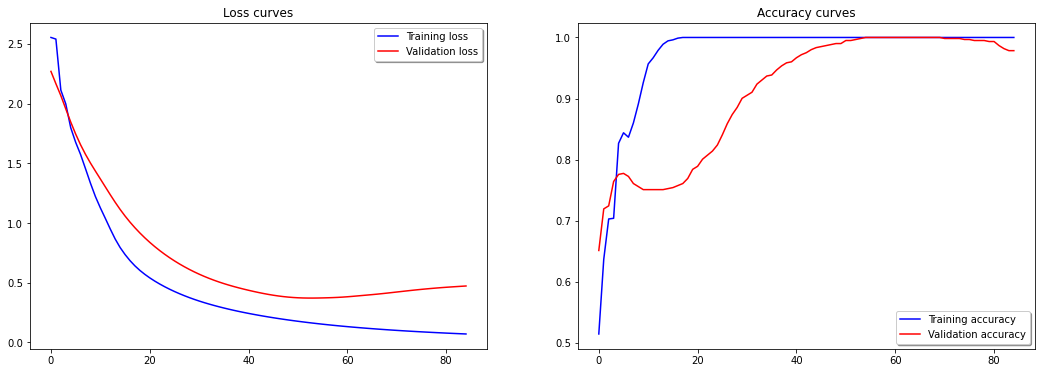

14     model_Wollongong
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 63.
Epoch 00093: early stopping
-----------------------------------------------------------------
Training was completed in 157.83 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.8351%
test accuracy = 99.8355%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

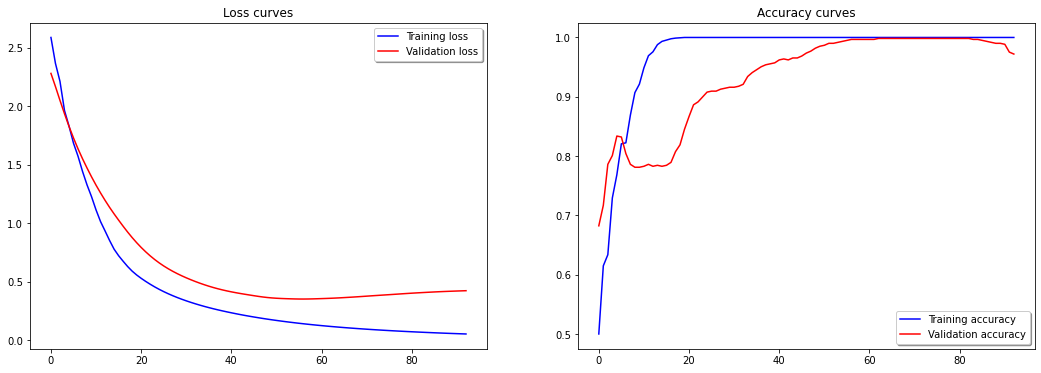

15     model_Canberra
Train data dimensions: (2056, 6, 62), (2056, 1)
Test data dimensions: (688, 6, 62), (688, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 17.
Epoch 00047: early stopping
-----------------------------------------------------------------
Training was completed in 127.02 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 94.4066%
test accuracy = 91.9408%
test error = 49 out of 608 examples


<Figure size 432x288 with 0 Axes>

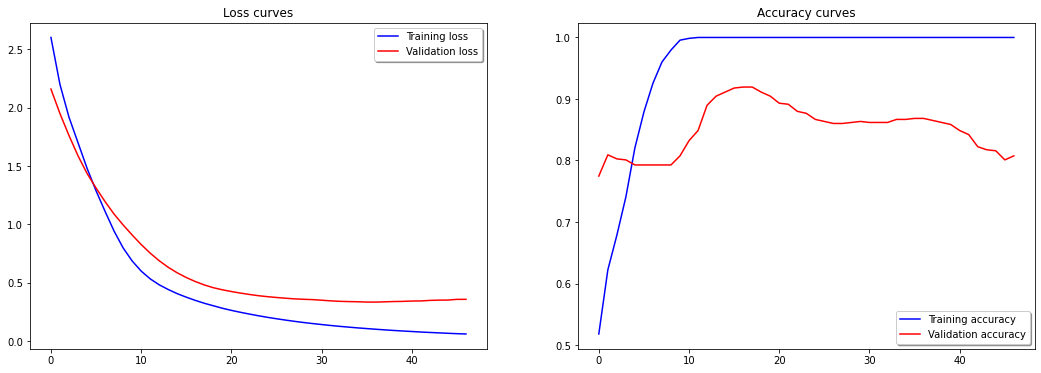

16     model_Tuggeranong
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 59.
Epoch 00089: early stopping
-----------------------------------------------------------------
Training was completed in 166.12 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.835%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

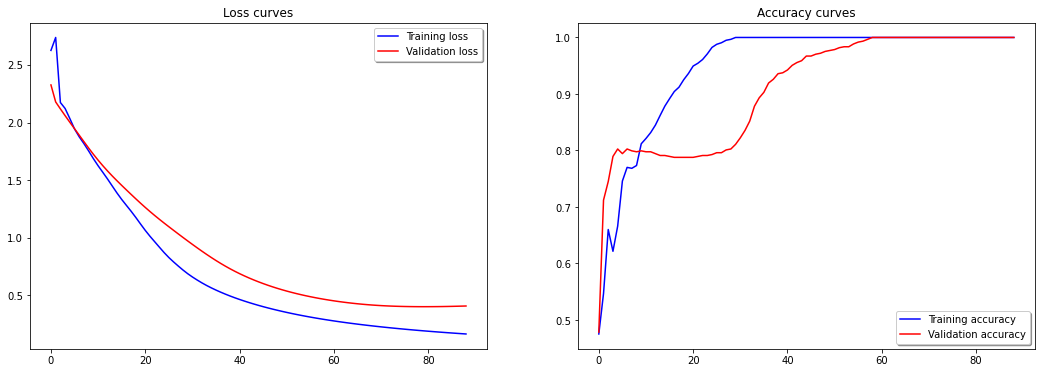

17     model_MountGinini
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Restoring model weights from the end of the best epoch: 57.
Epoch 00087: early stopping
-----------------------------------------------------------------
Training was completed in 153.37 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.6701%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

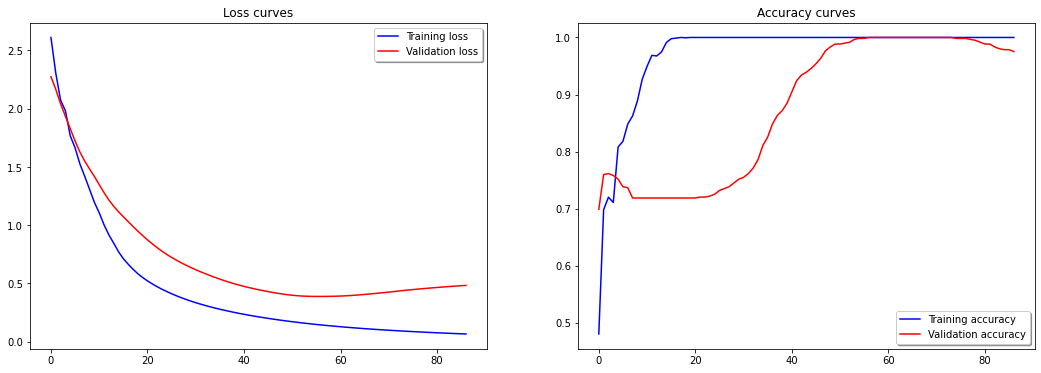

18     model_Ballarat
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


-----------------------------------------------------------------
Training was completed in 182.72 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 98.0209%
test accuracy = 95.7237%
test error = 26 out of 608 examples


<Figure size 432x288 with 0 Axes>

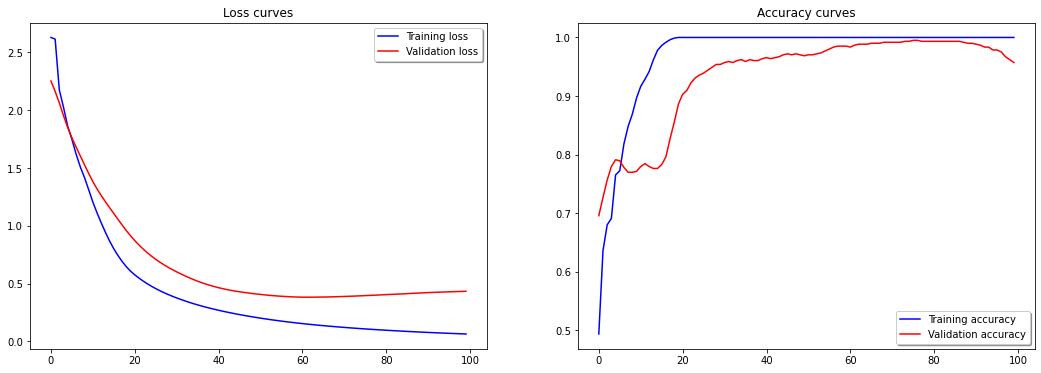

19     model_Bendigo
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


-----------------------------------------------------------------
Training was completed in 176.08 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

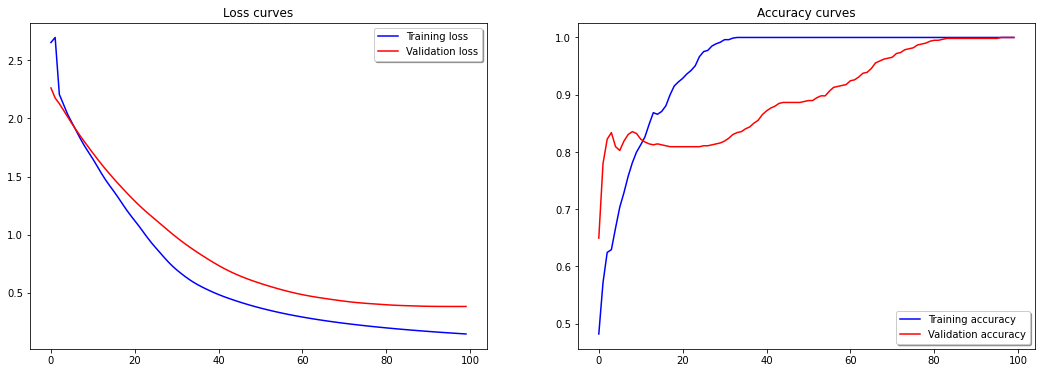

20     model_Sale
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 

In [238]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 5+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(GRU(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(GRU(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(GRU(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)